# TP Challenge

Replace your_name  by your name 

## Your task

Today you are a datascientist for a marketing saas company.
You have some data about your customer, a file with some features and the target **buy**.

The target variable is whether a customer will click 'Buy' on a website. Buy = 0 and Buy = 1 indicate 'no' and 'yes' respectively. Independent variables capture customer background and customer website navigation behavior information. First variable in the train.csv data file identifies each customer uniquely.

**The challenge is to correctly predict if a customer will click 'buy' on a website.**

In [12]:
import pandas as pd

train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

## Importing Librairies

In [13]:
#import the librairies
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier

# Preprocessing

- Check if missing values

- Check if duplicates ( if yes delete duplicated rows)

In [14]:
#missings values
train_data_missing = train_data.isnull().sum()
print(train_data_missing)
test_data_missing = test_data.isnull().sum()
print(test_data_missing)

#duplicates
train_data_duplicates = train_data.duplicated()
train_data = train_data.drop_duplicates()
print("train duplicates deleted : ", sum(train_data_duplicates))

test_data_duplicates = test_data.duplicated()
test_data = test_data.drop_duplicates()
print("test duplicates deleted : ", sum(test_data_duplicates))

Id     0
V2     0
V3     0
V4     0
V5     0
      ..
V83    0
V84    0
V85    0
V86    0
Buy    0
Length: 87, dtype: int64
Id     0
V2     0
V3     0
V4     0
V5     0
      ..
V82    0
V83    0
V84    0
V85    0
V86    0
Length: 86, dtype: int64
train duplicates deleted :  0
test duplicates deleted :  0


## Visualization 

- Check if you have outliers in each features (columns) using seaborn or matplotlib
- Check the correlation between each columns ( seaborn can maybe help you.. )[https://seaborn.pydata.org/generated/seaborn.pairplot.html]

- Plot the distribution of the target


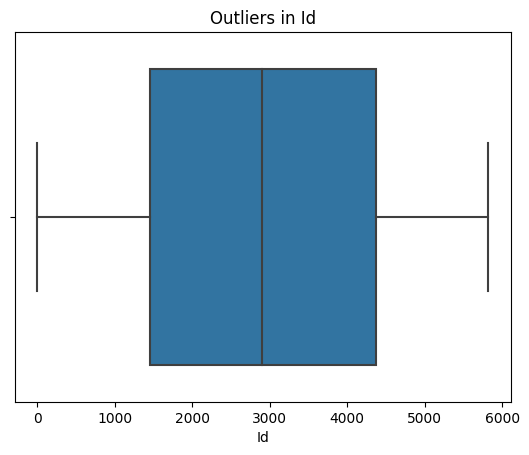

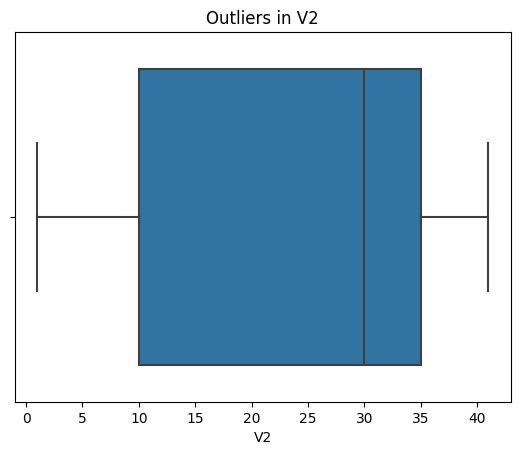

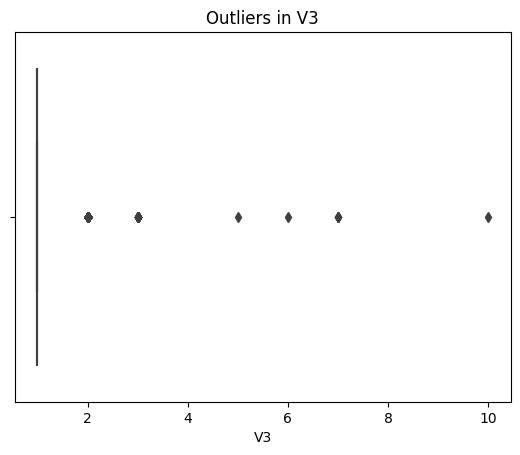

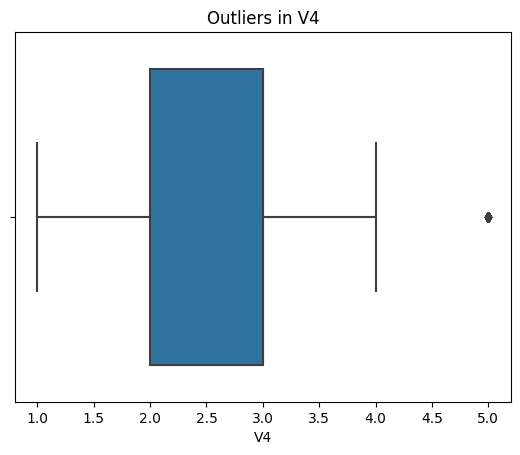

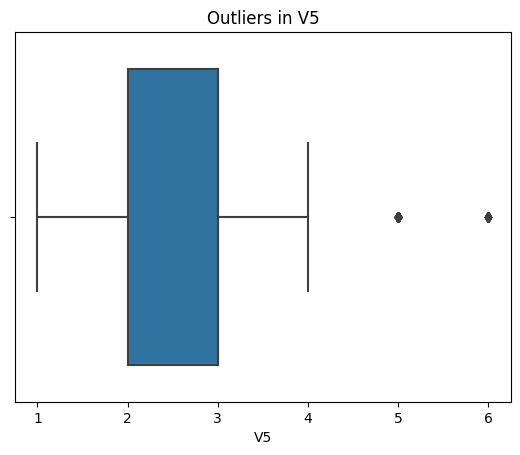

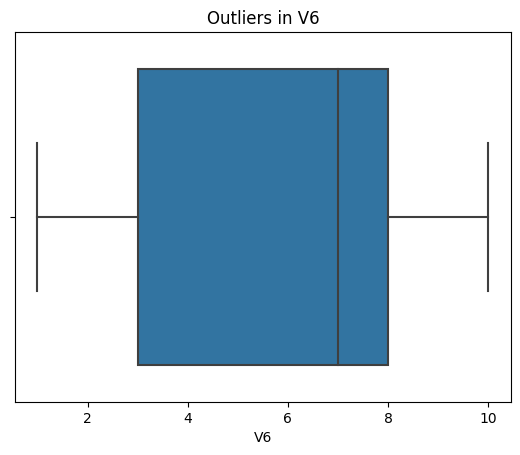

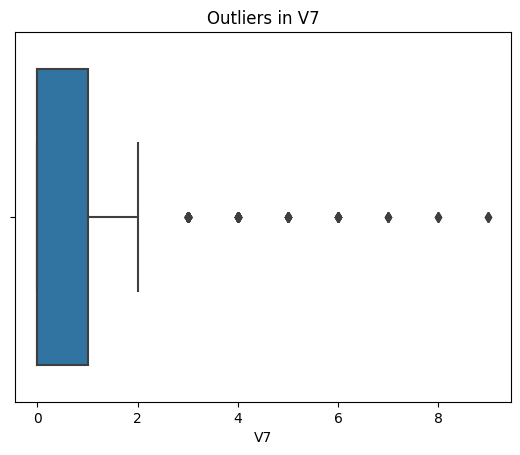

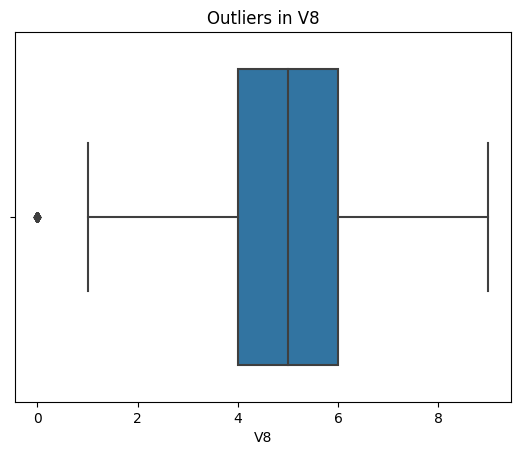

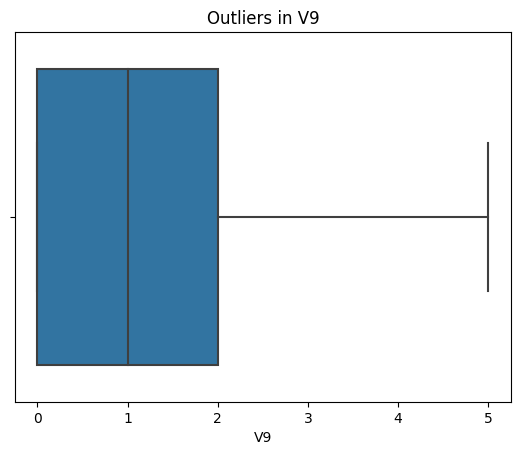

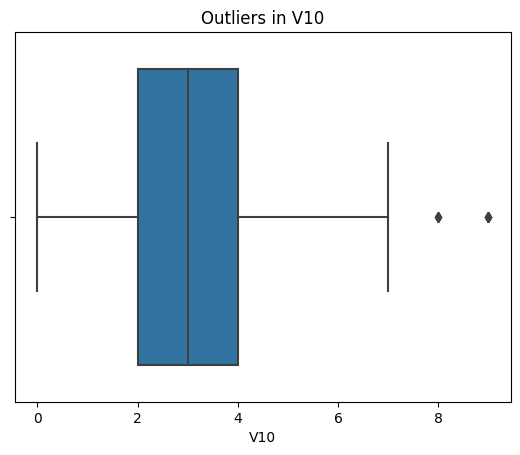

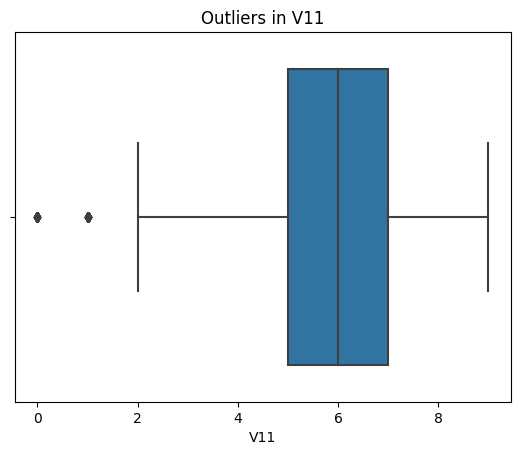

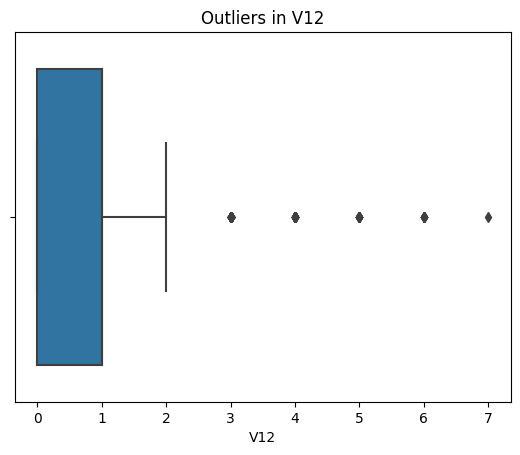

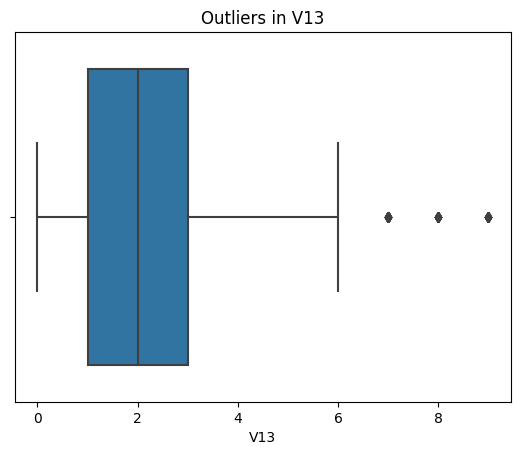

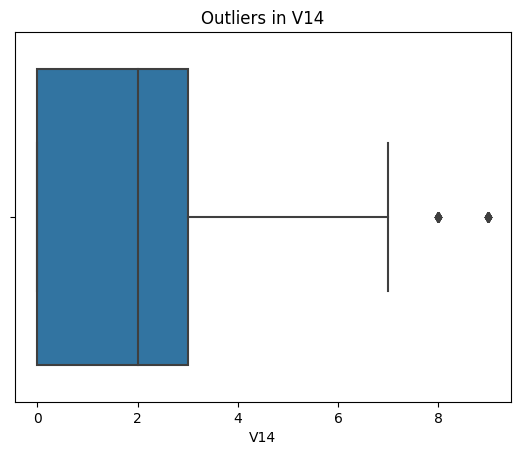

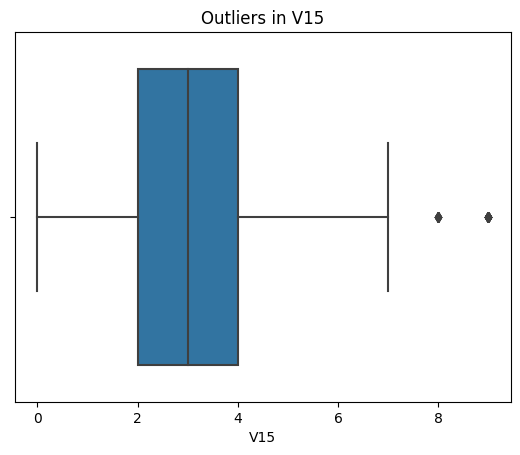

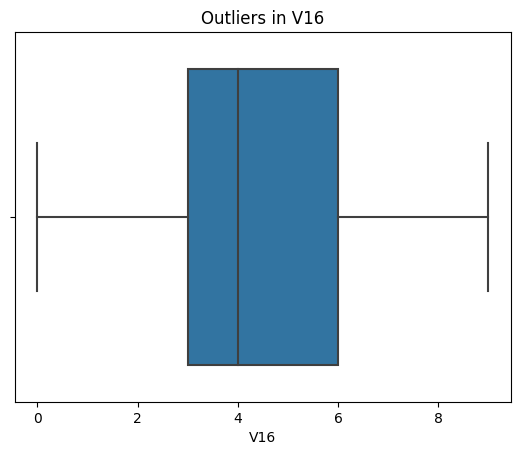

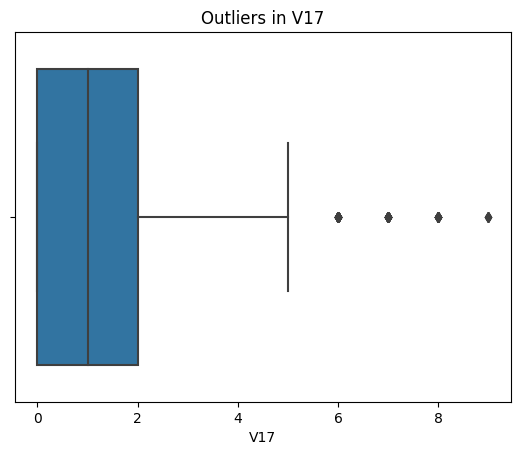

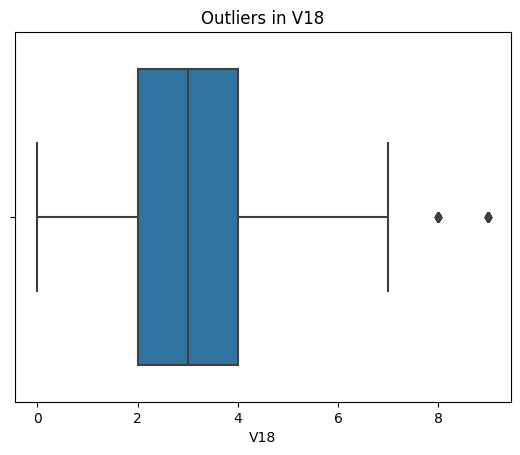

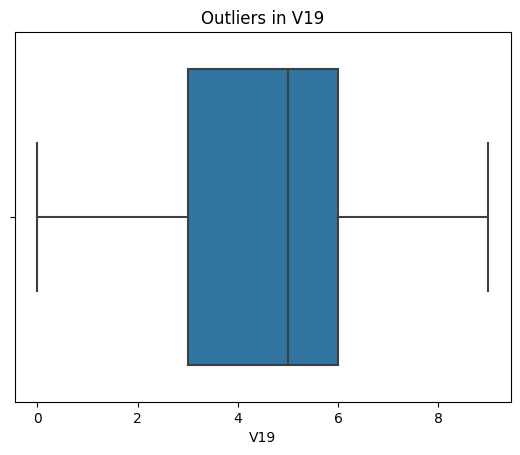

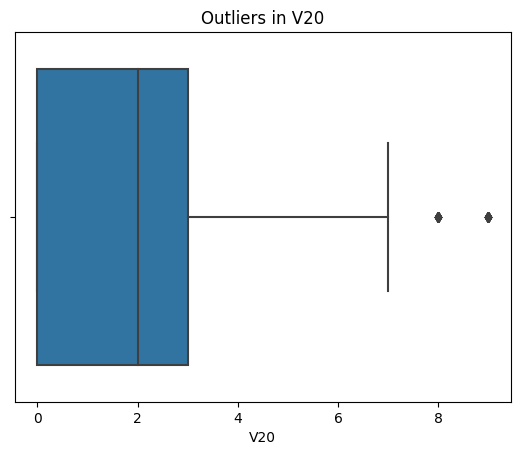

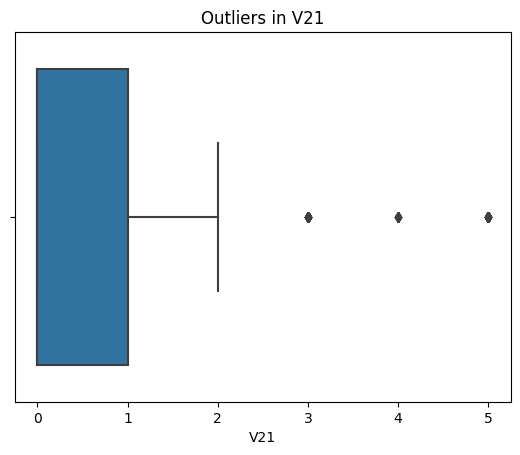

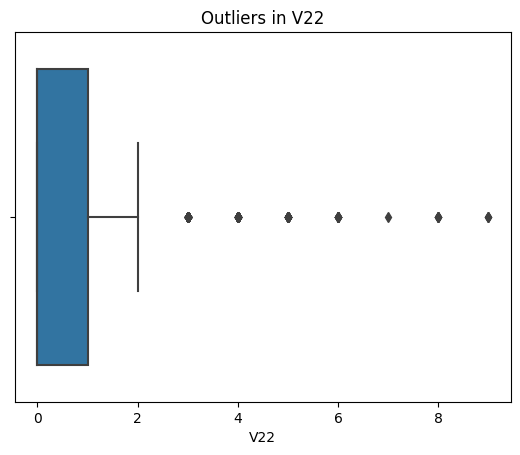

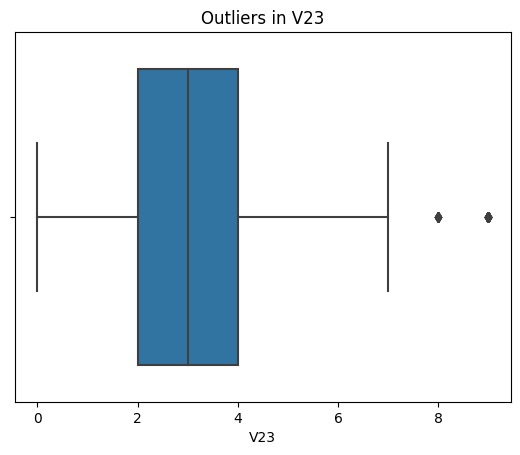

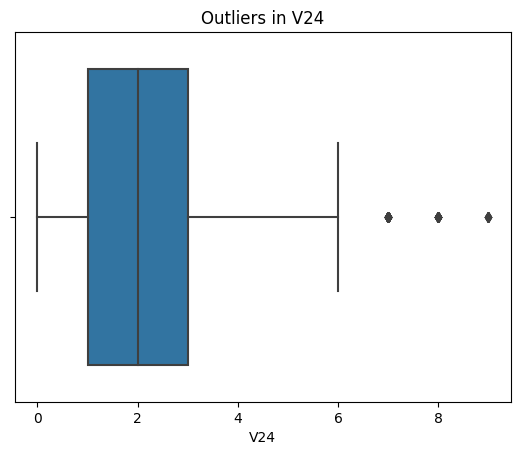

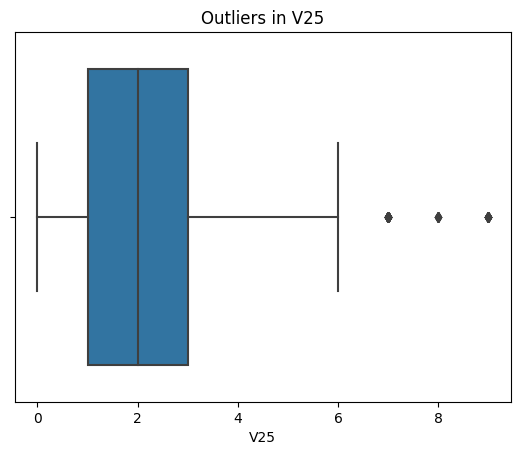

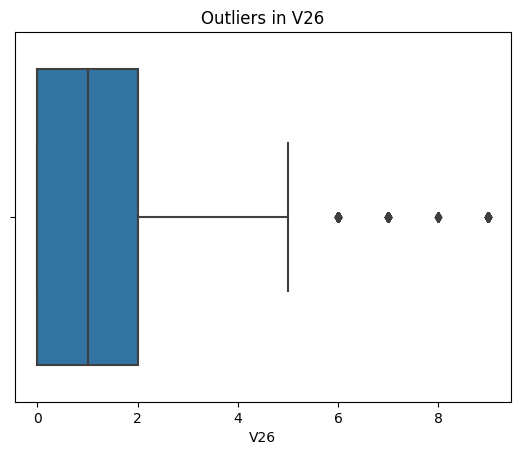

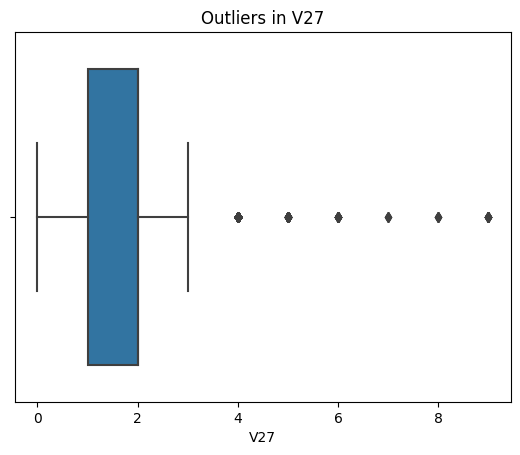

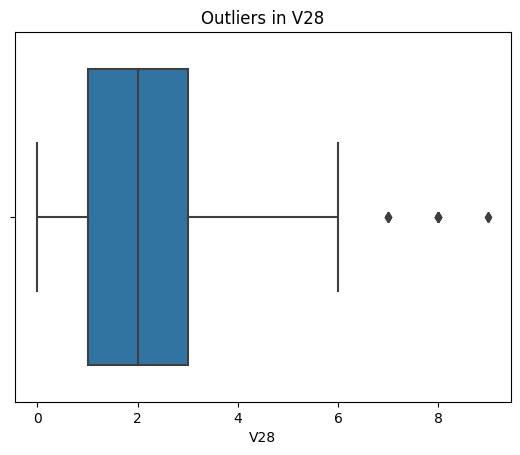

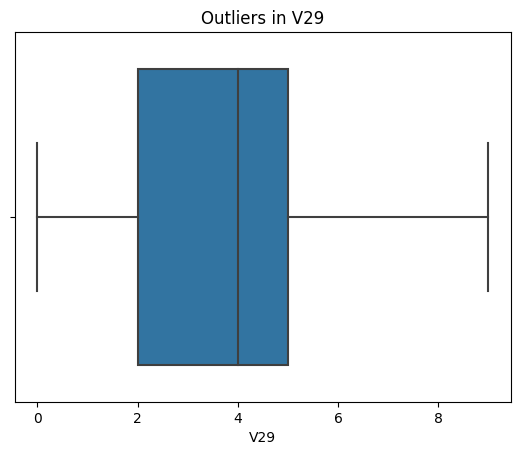

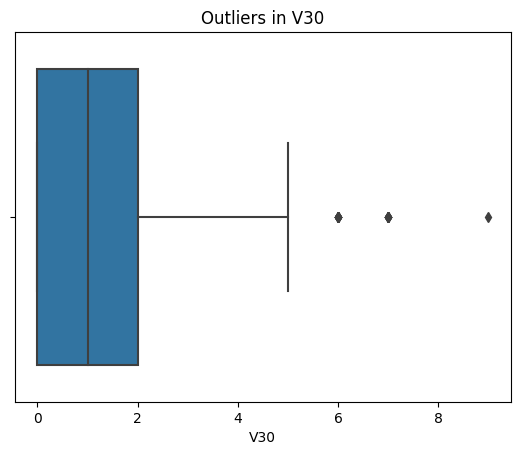

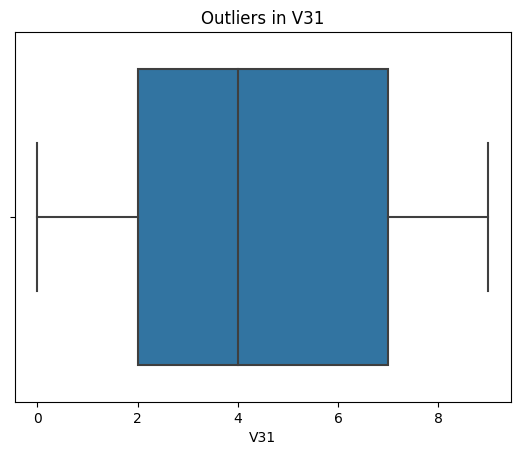

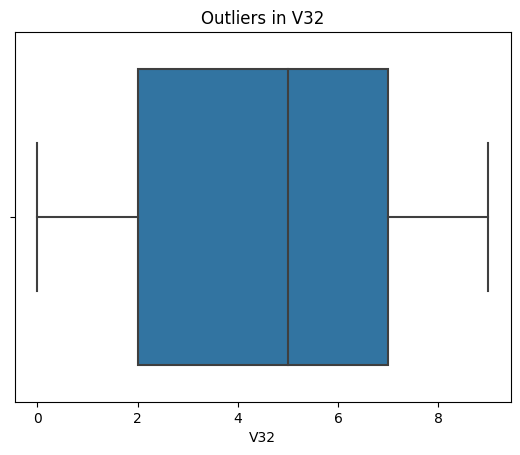

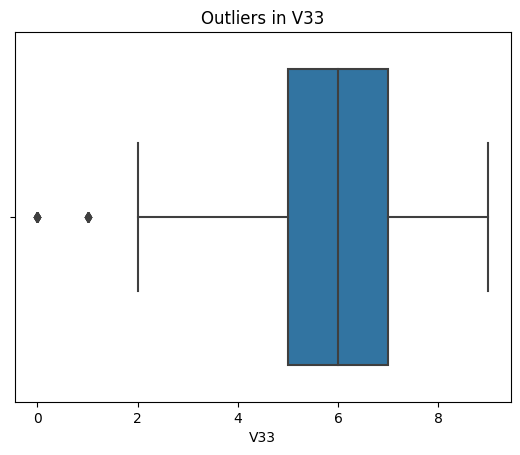

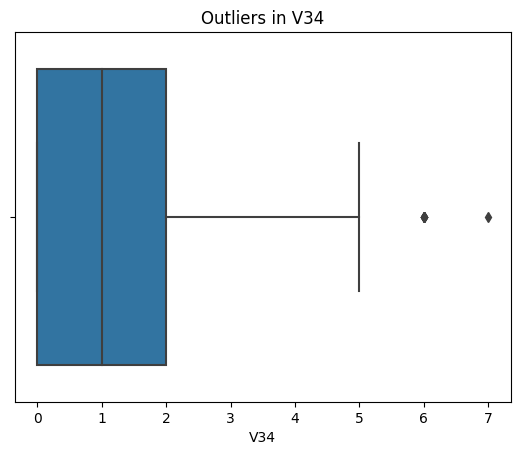

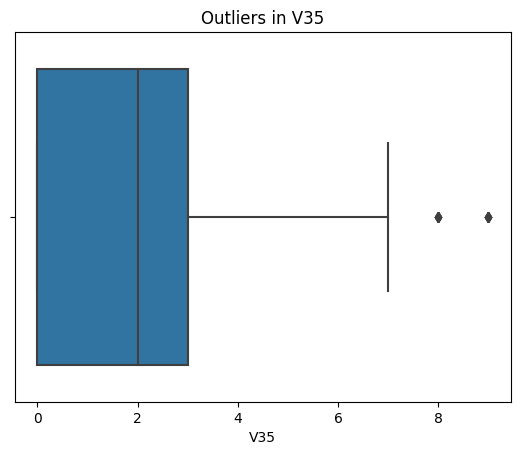

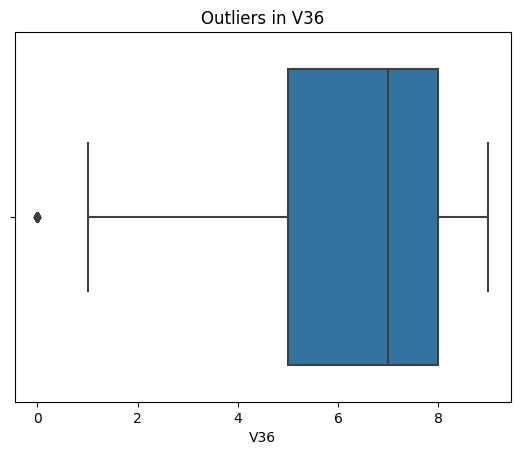

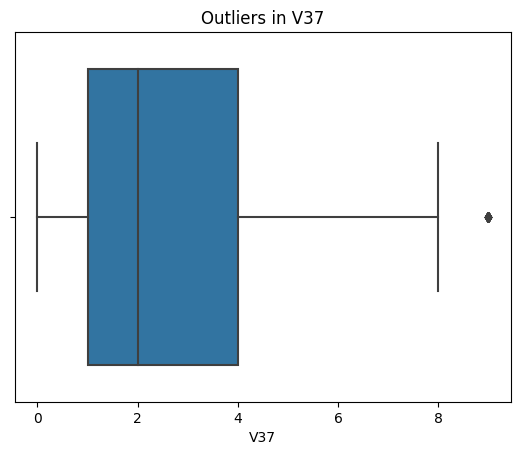

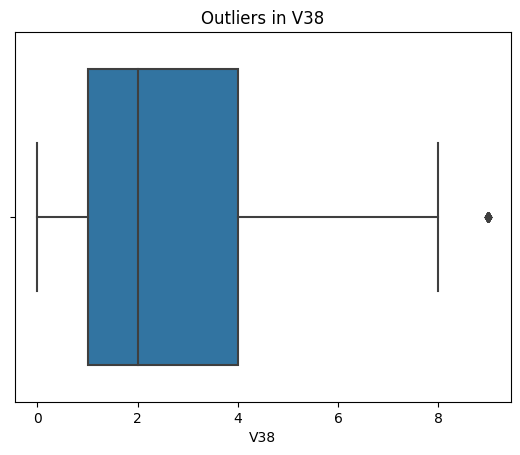

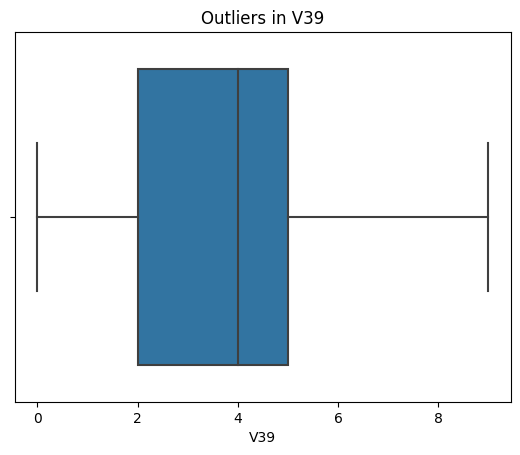

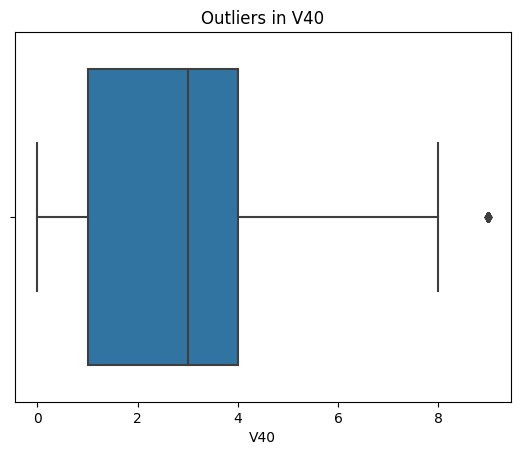

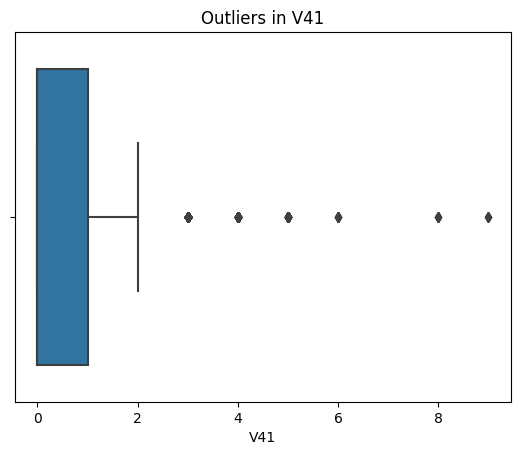

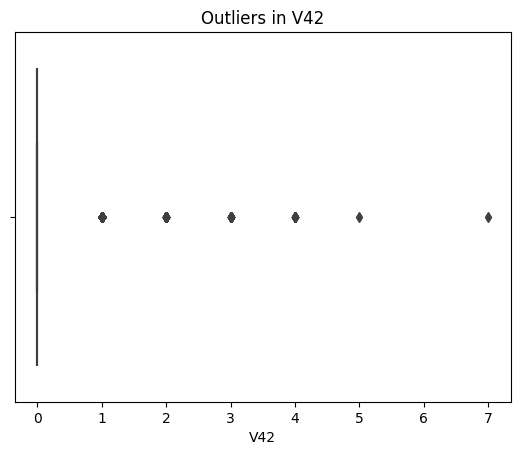

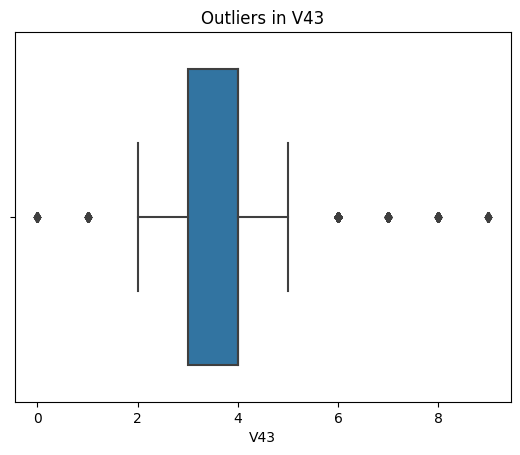

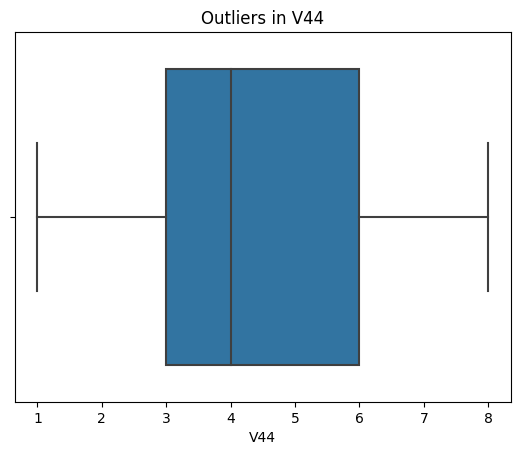

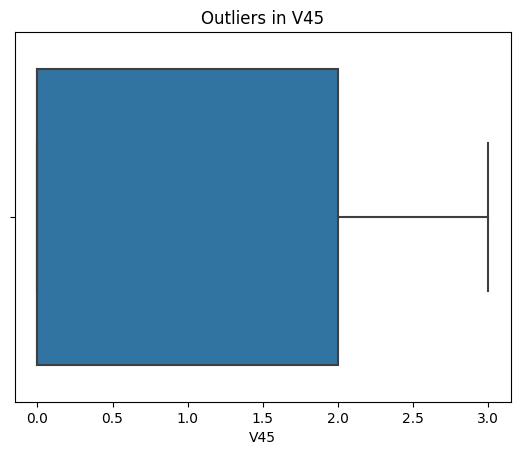

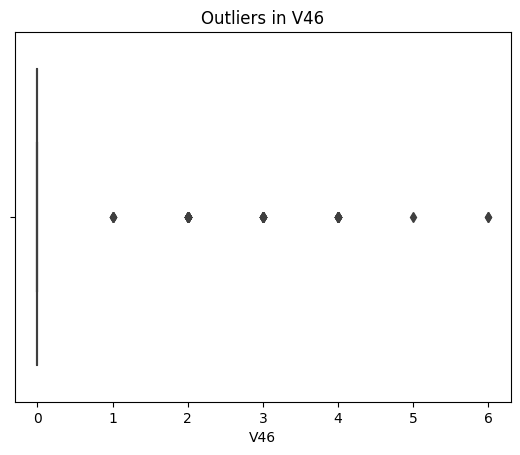

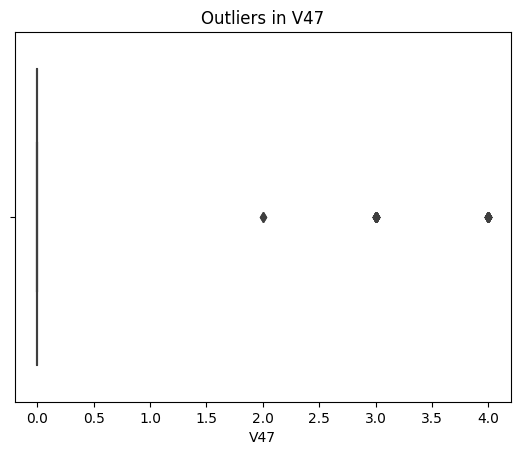

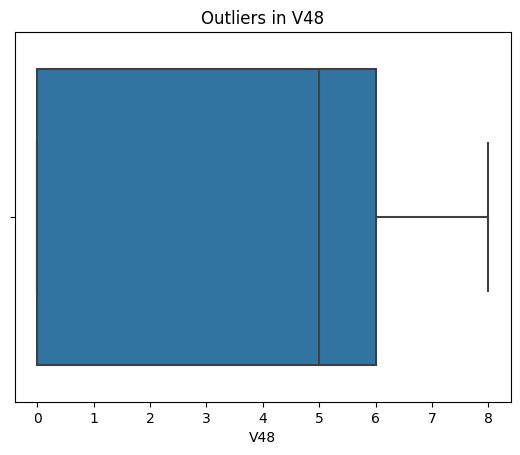

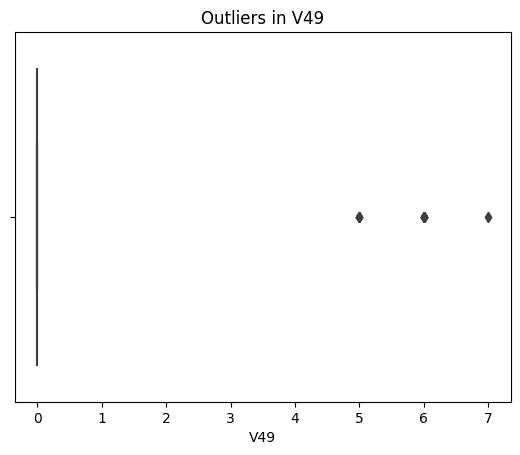

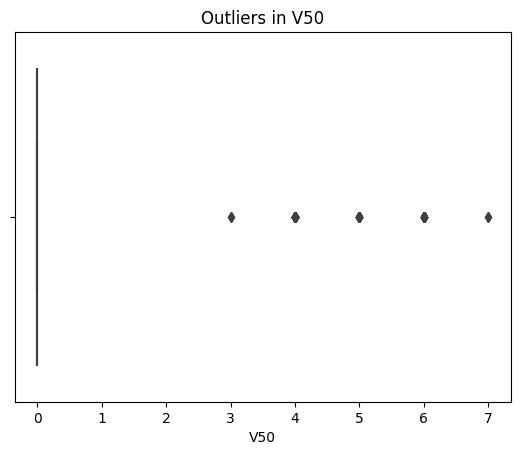

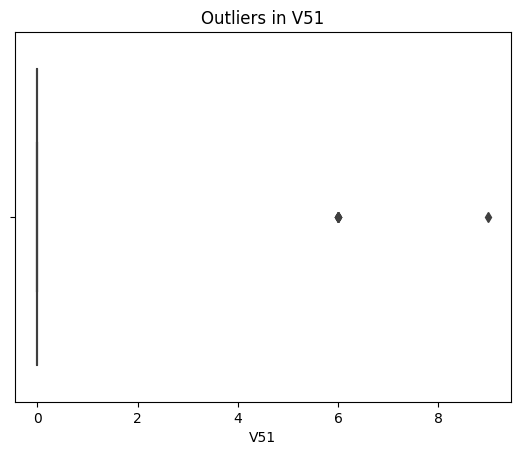

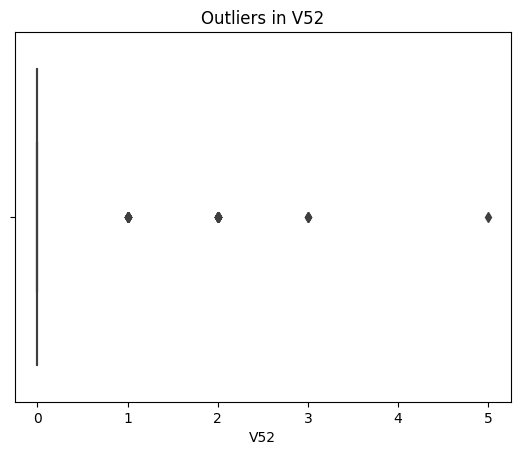

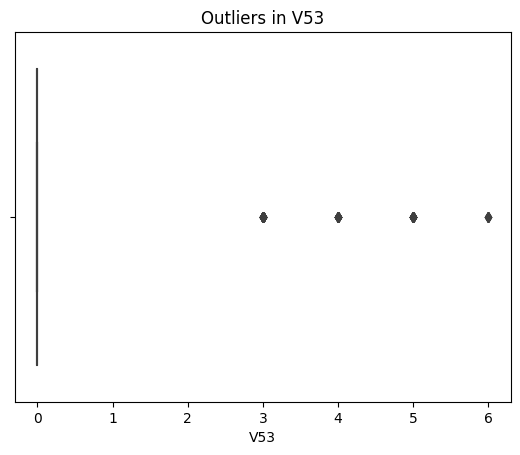

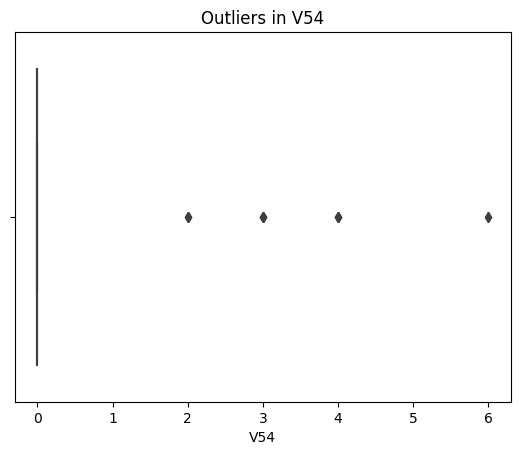

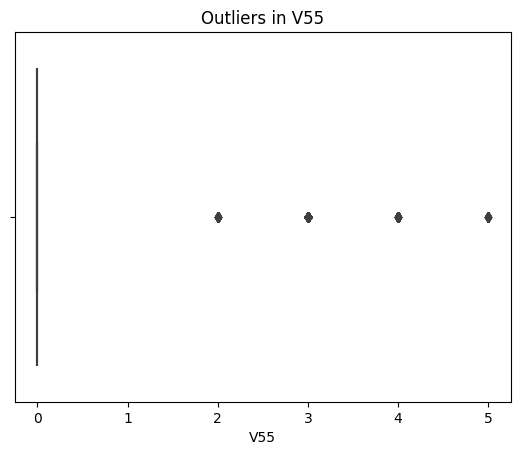

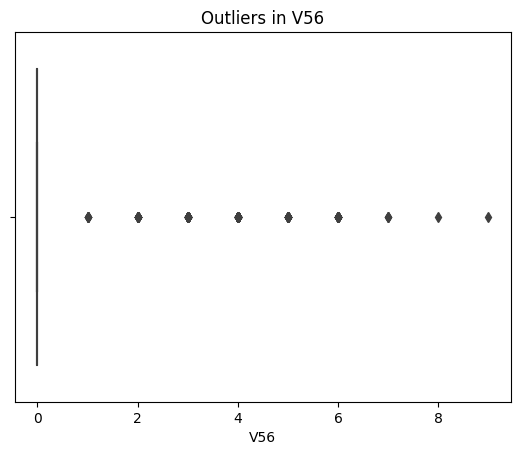

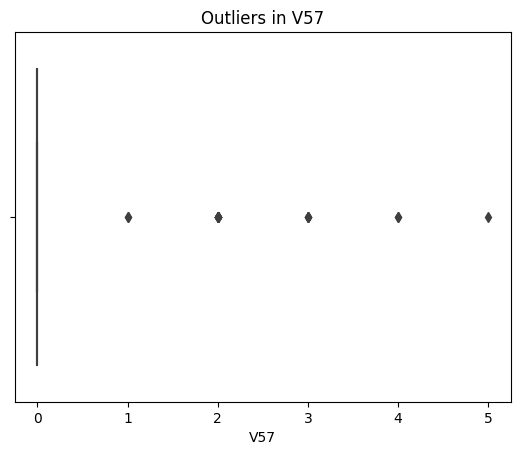

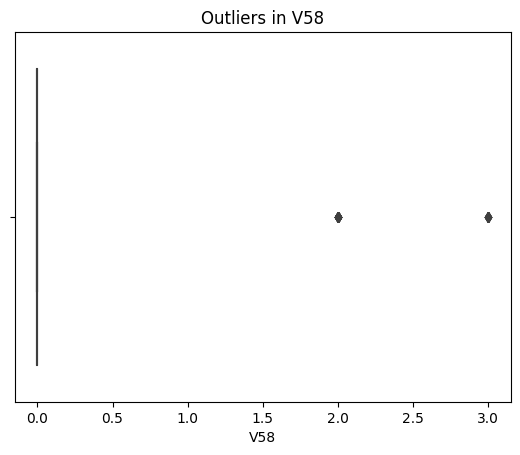

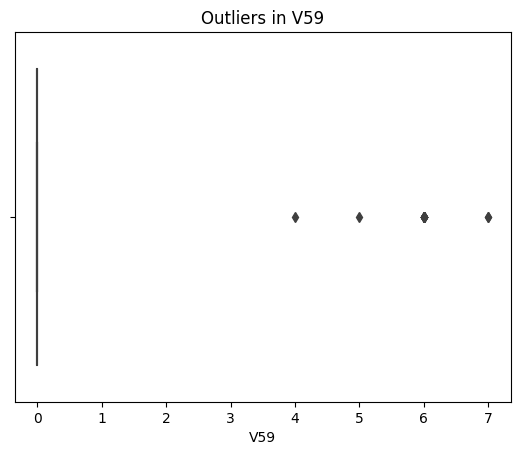

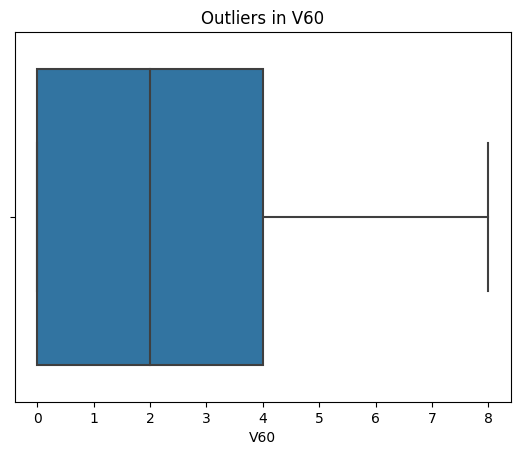

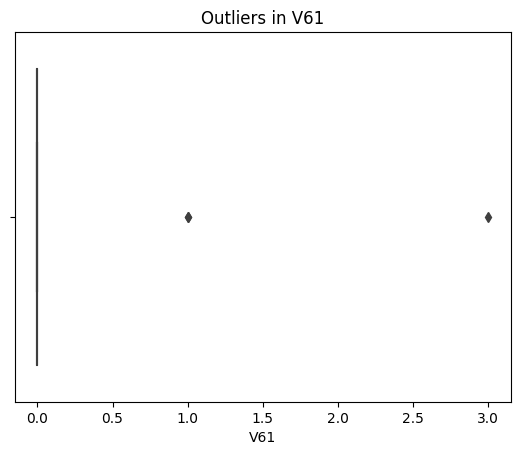

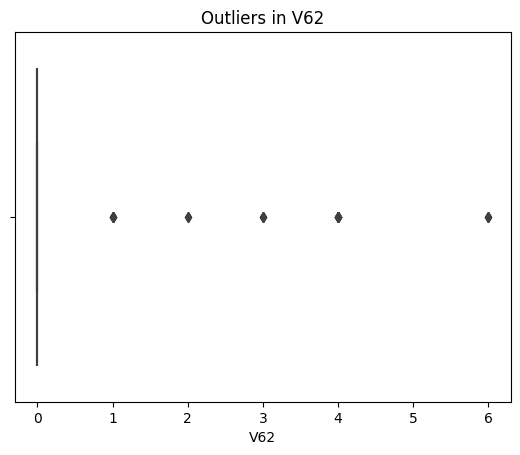

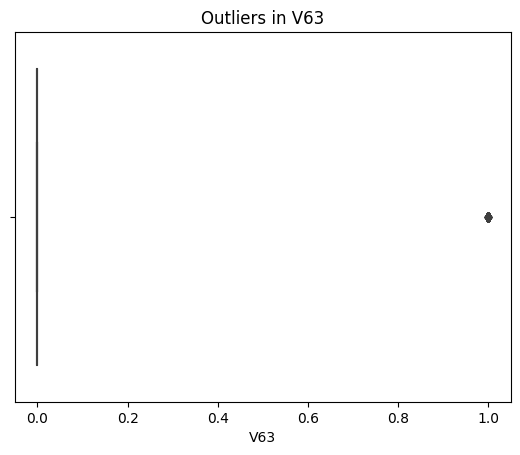

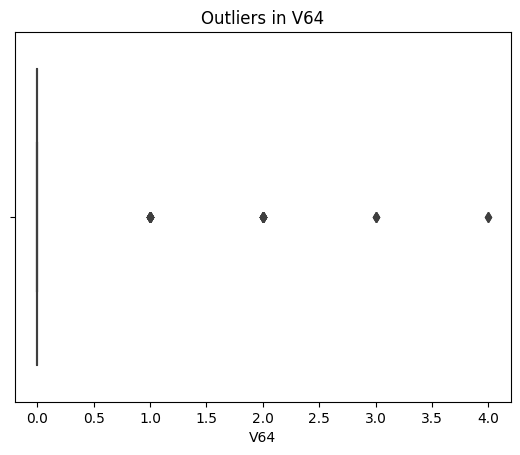

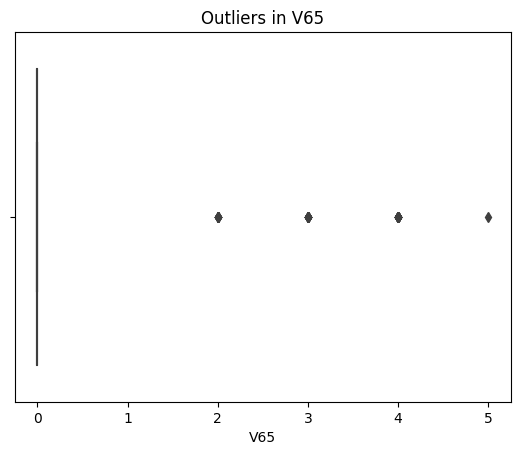

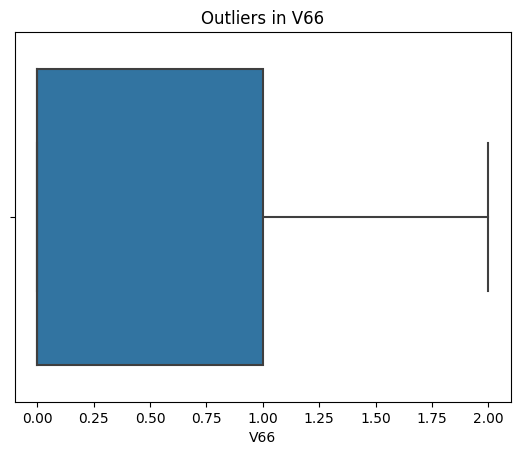

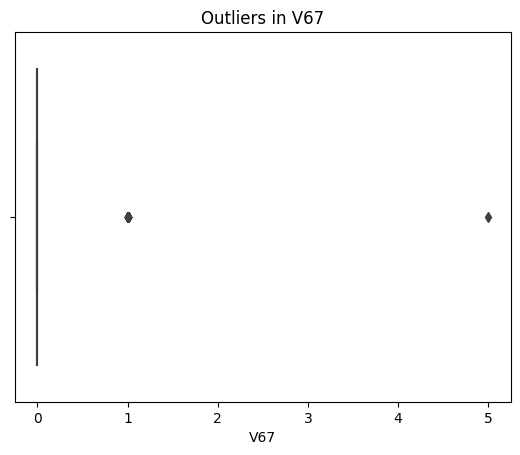

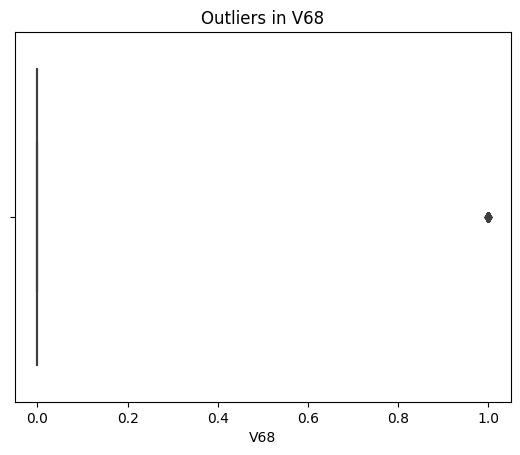

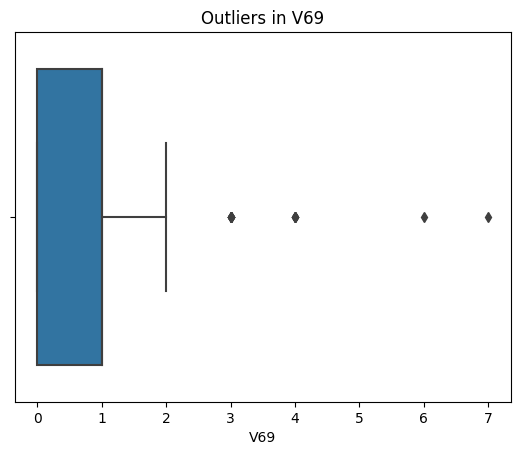

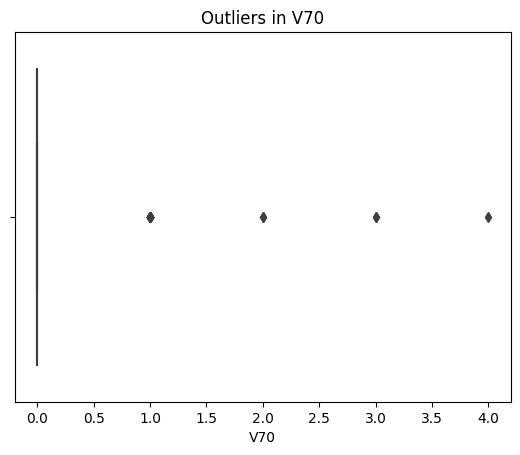

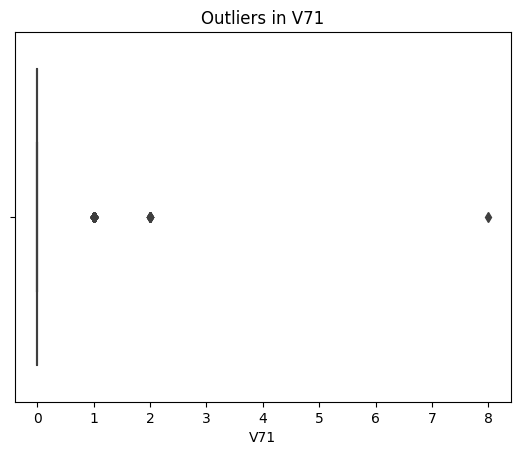

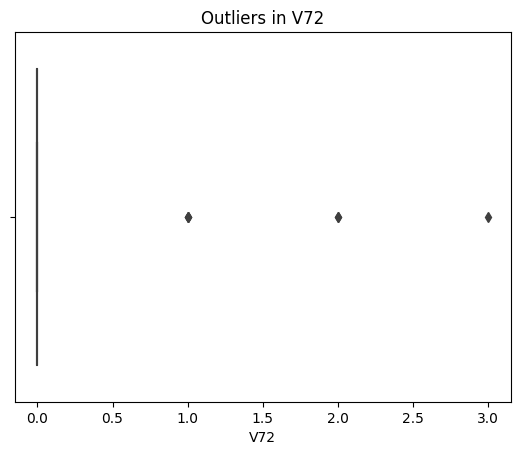

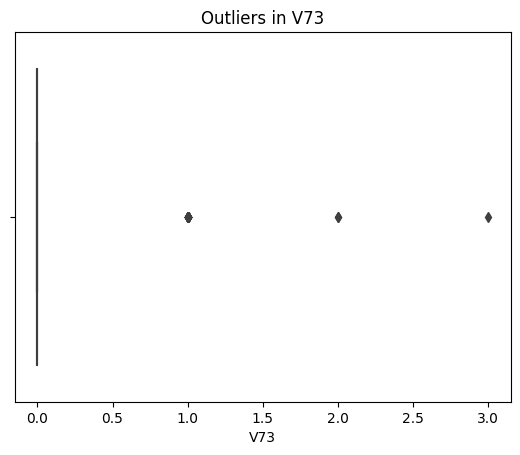

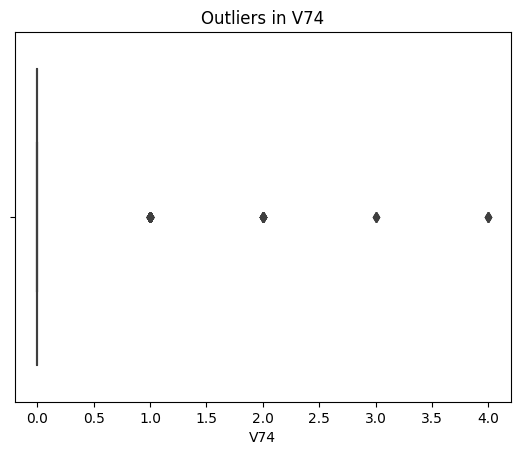

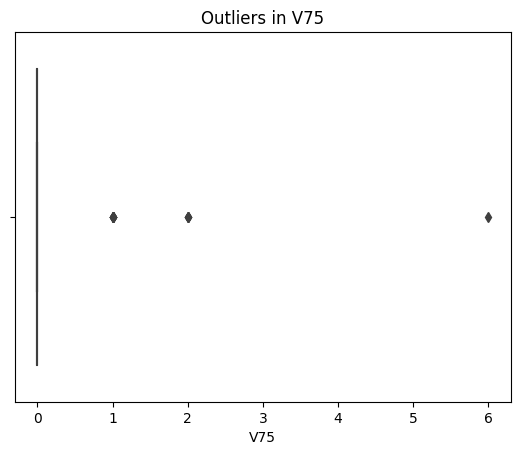

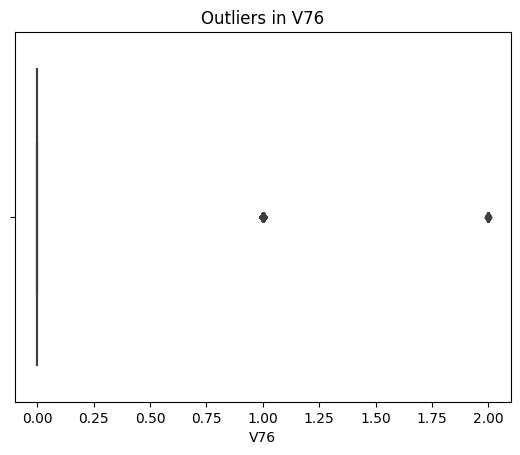

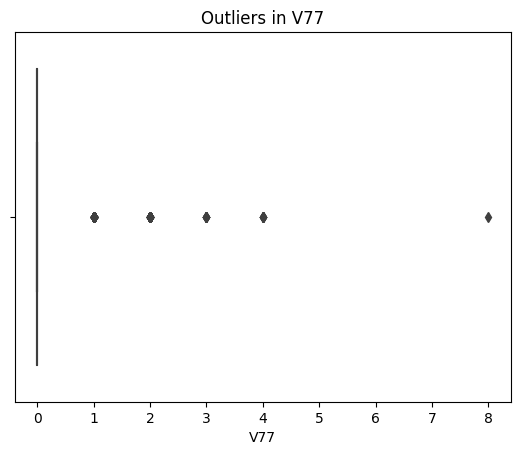

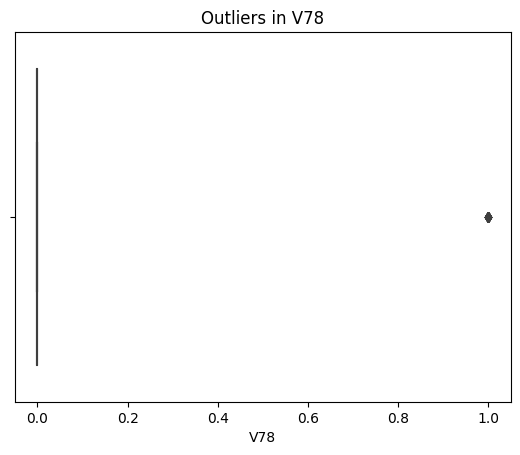

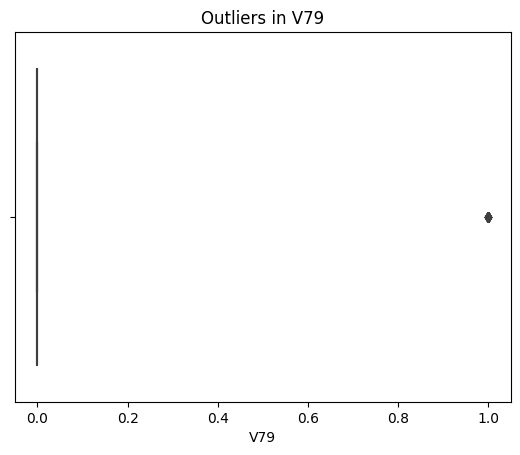

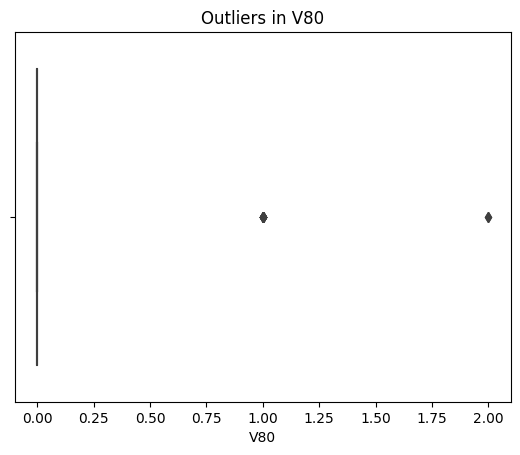

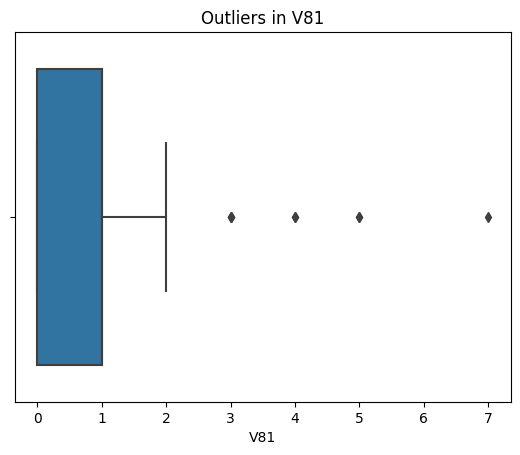

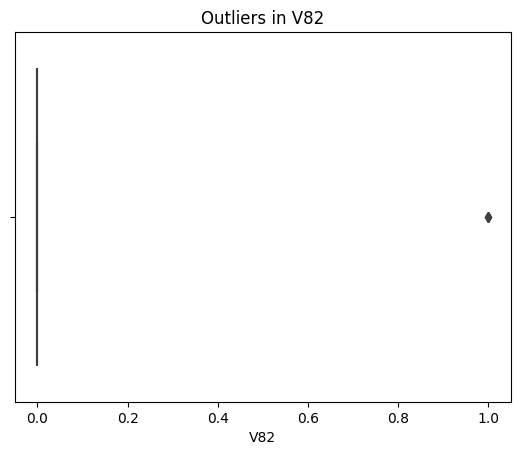

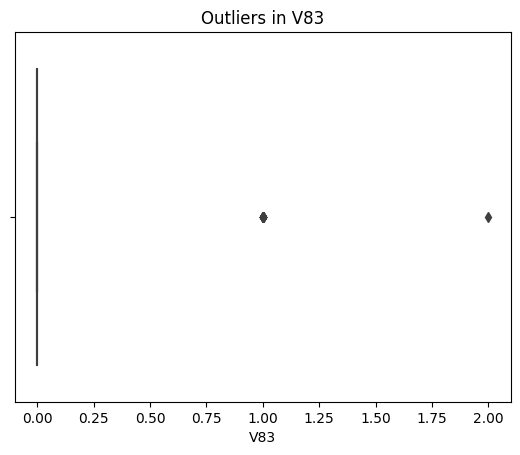

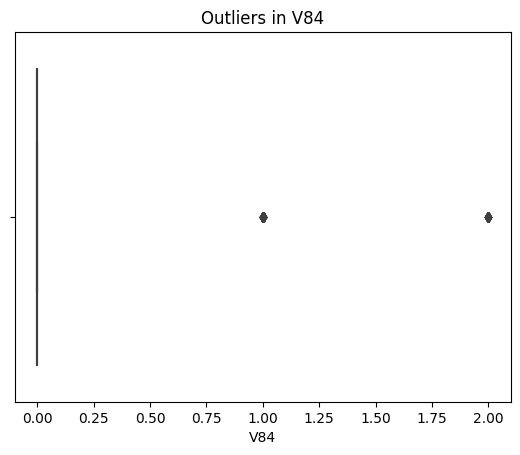

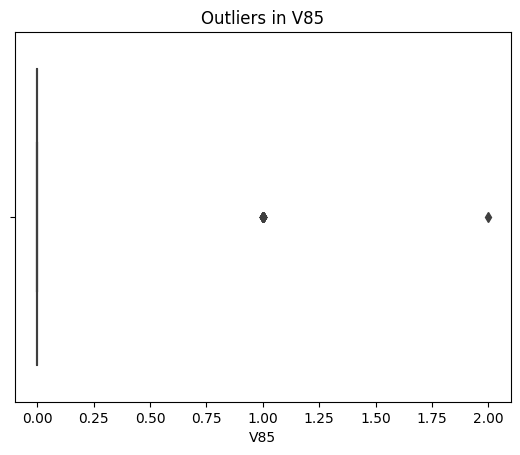

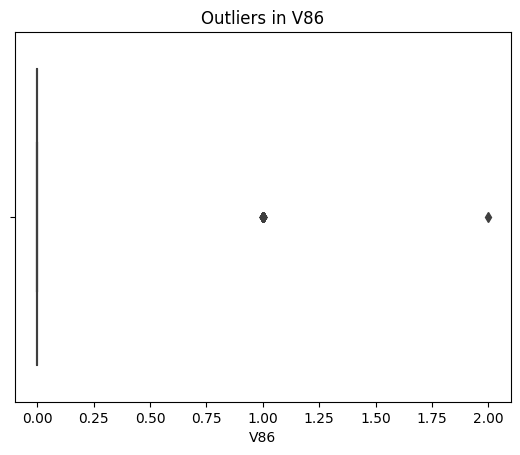

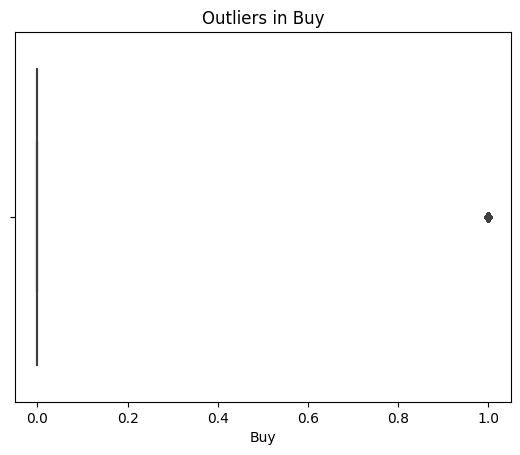

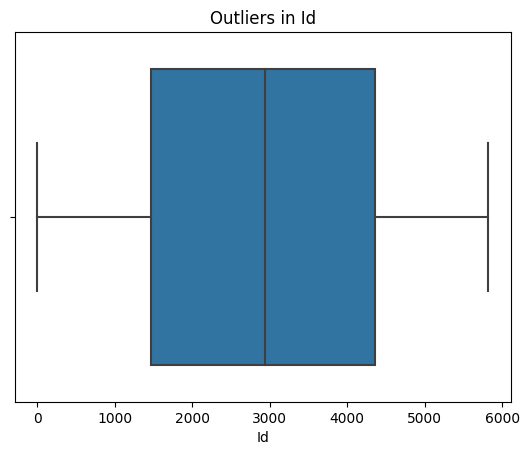

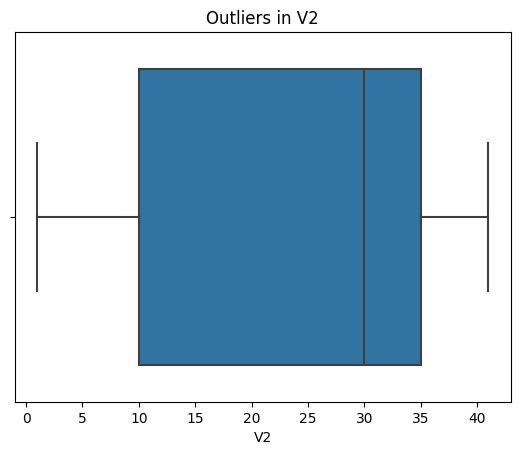

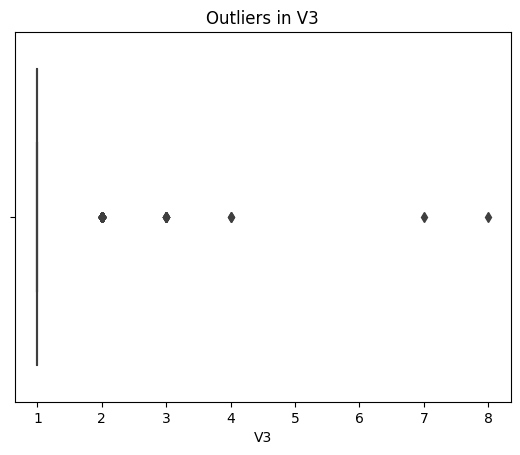

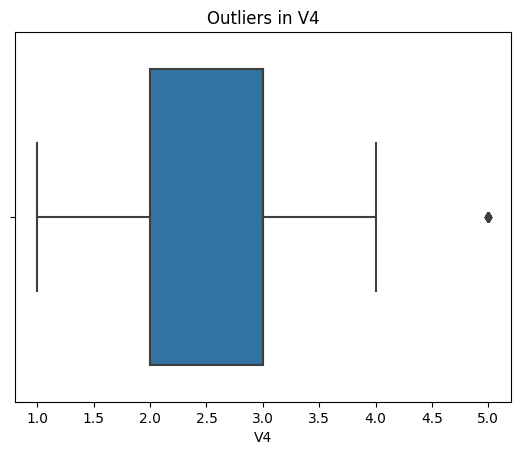

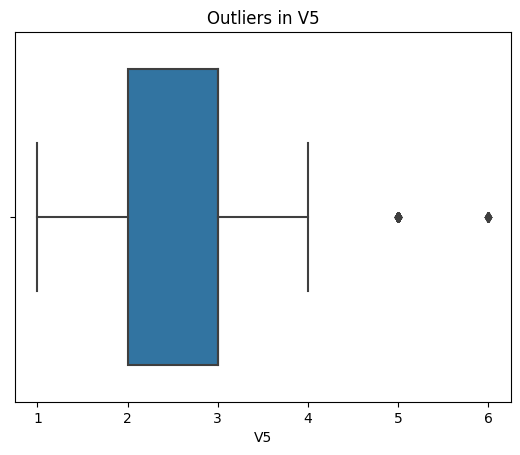

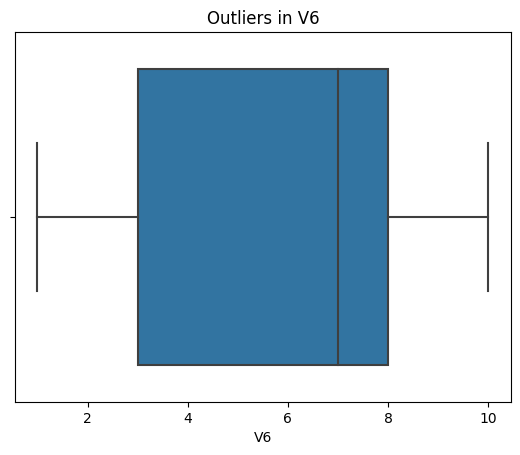

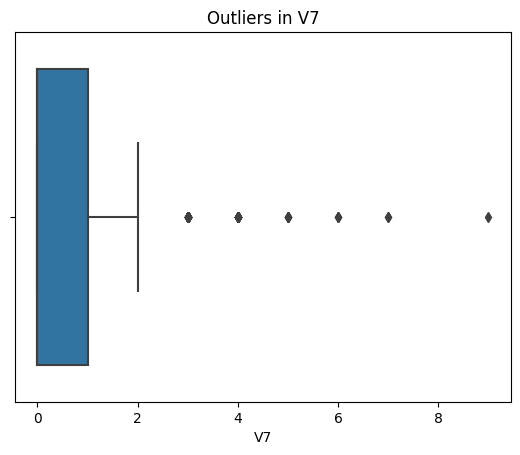

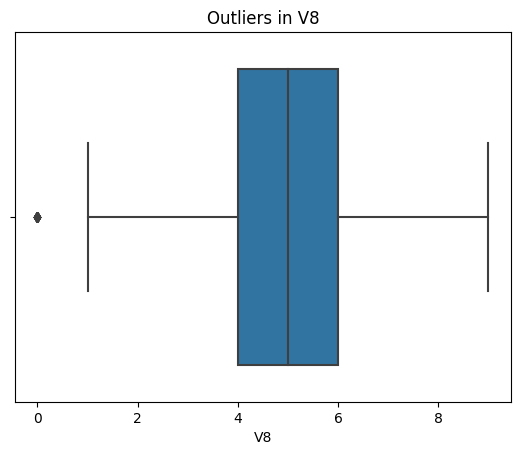

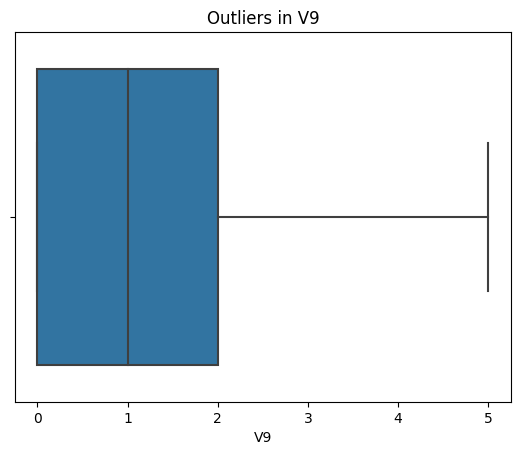

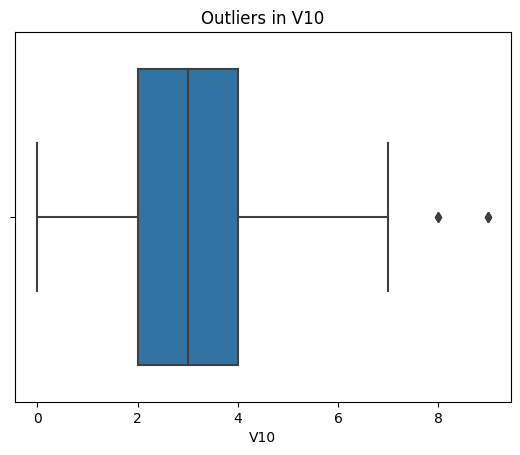

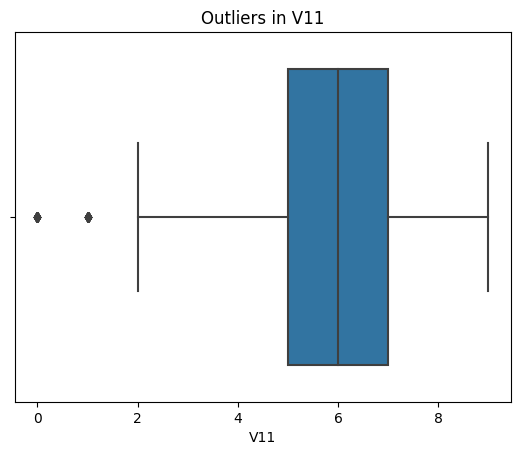

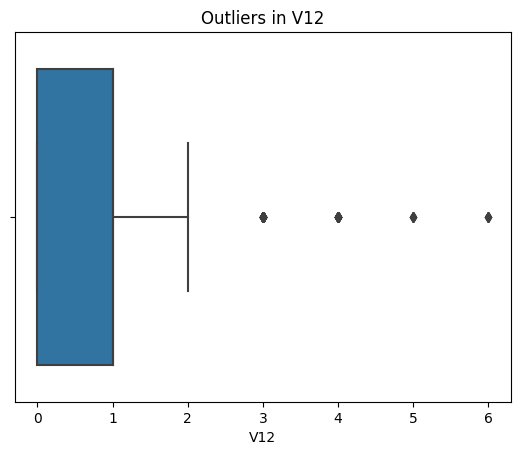

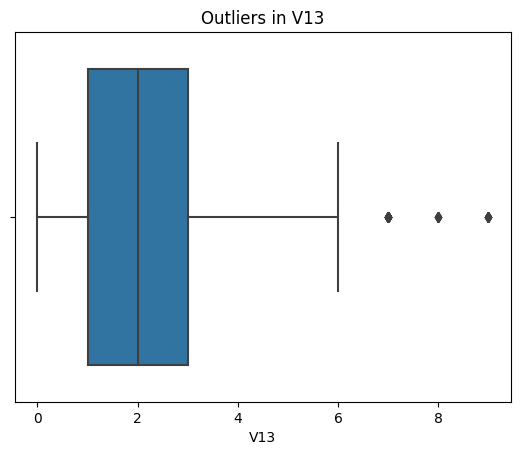

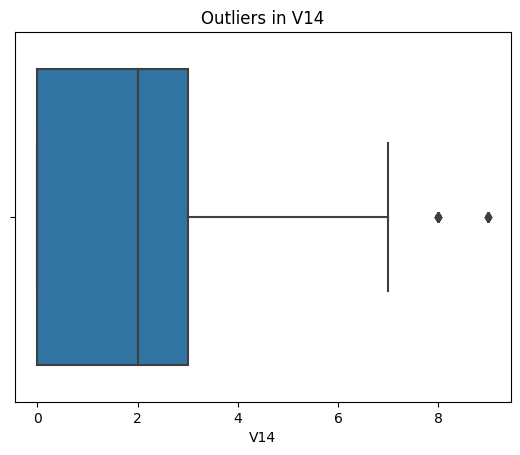

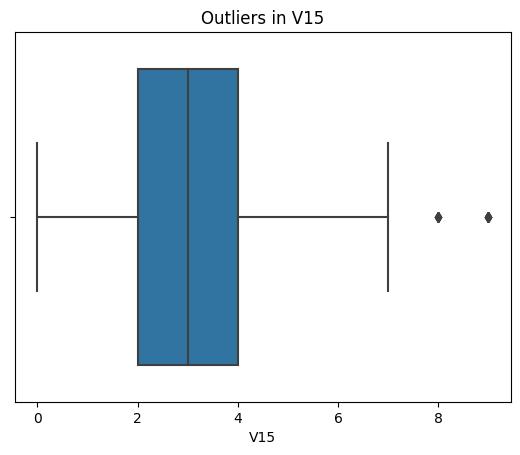

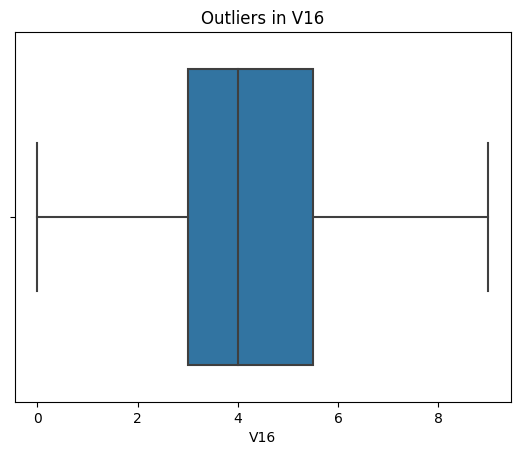

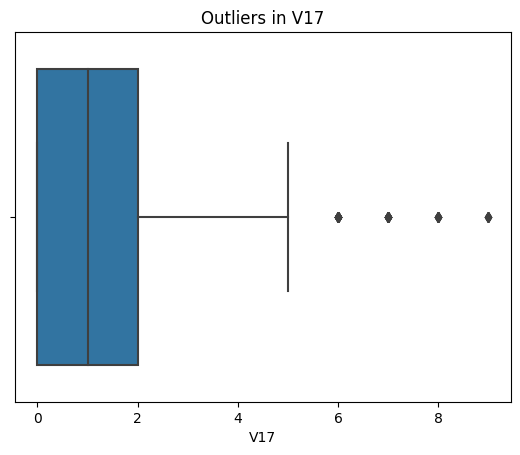

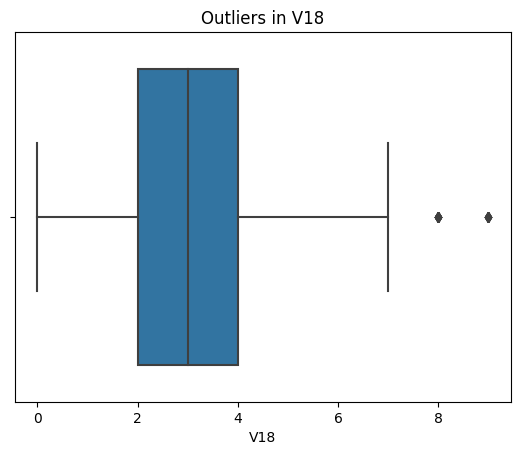

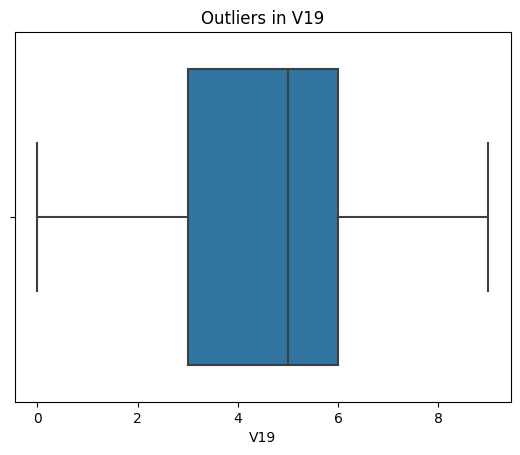

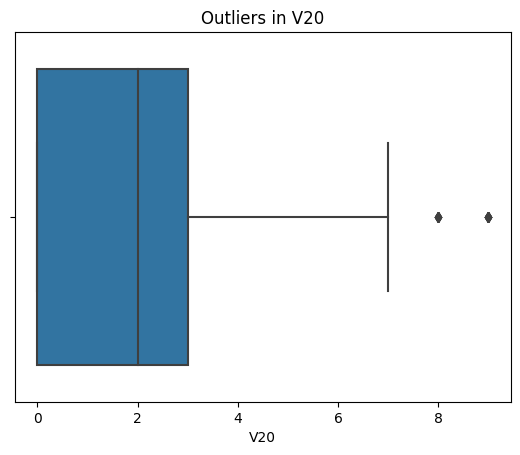

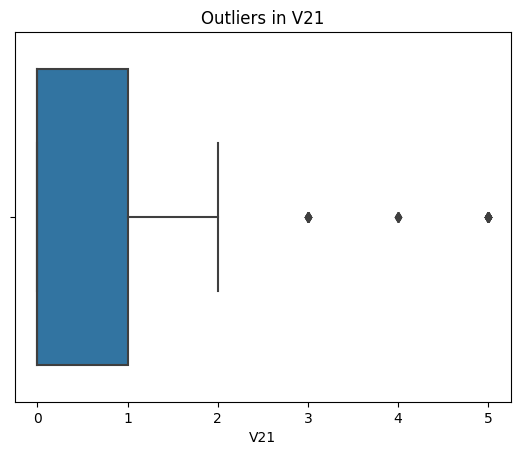

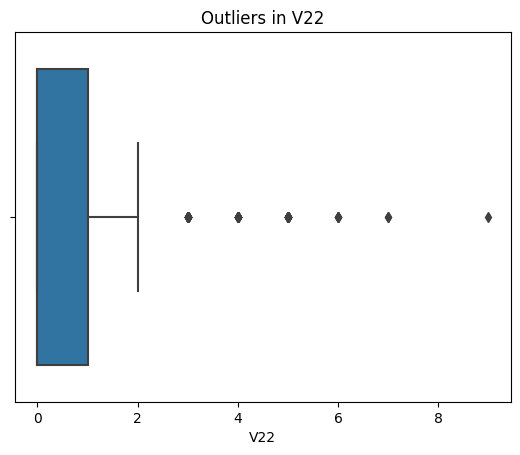

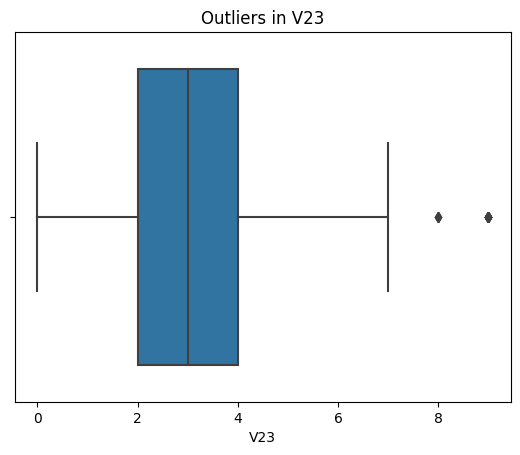

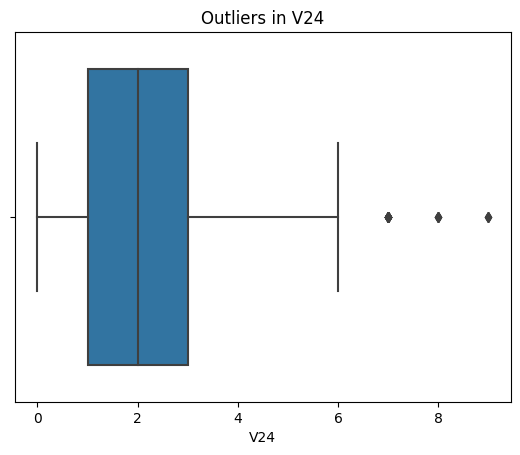

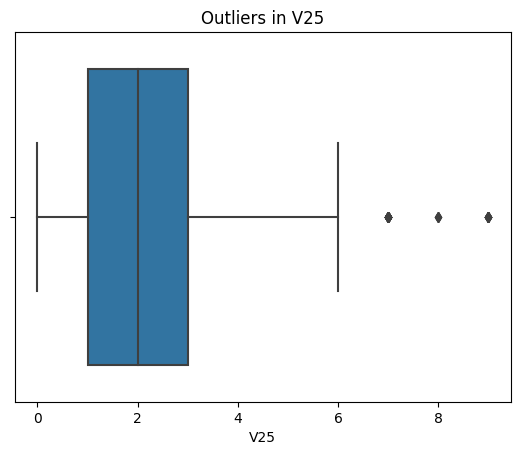

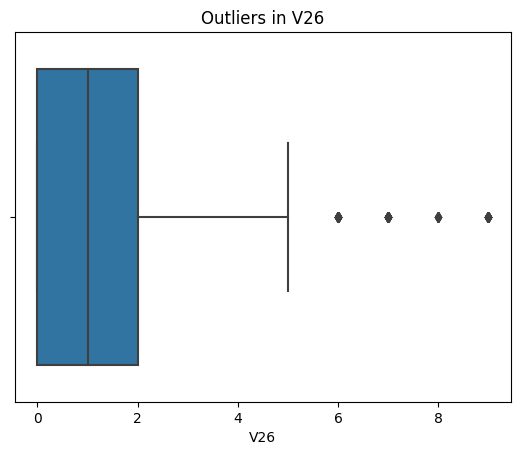

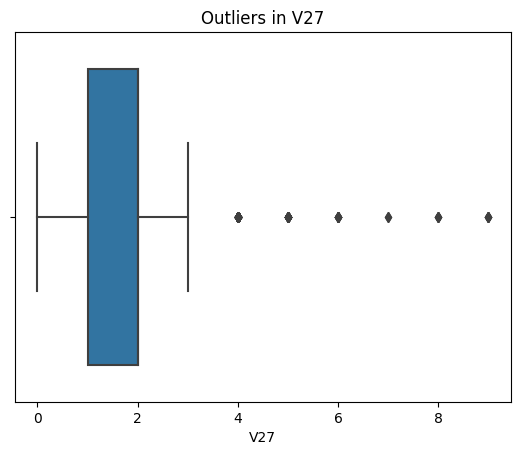

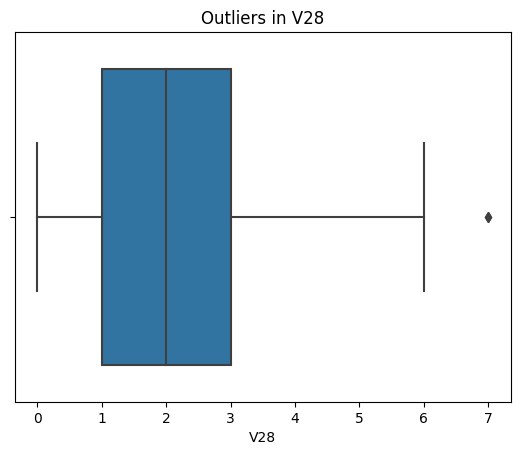

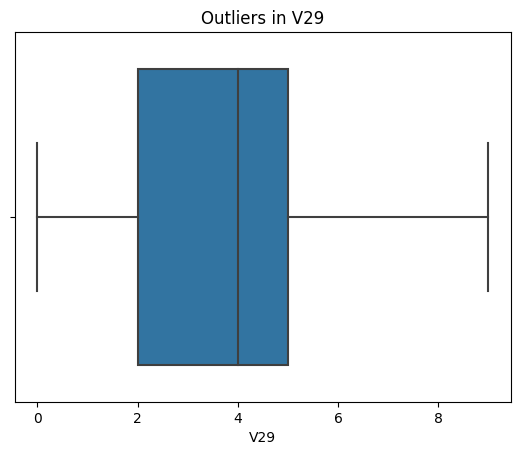

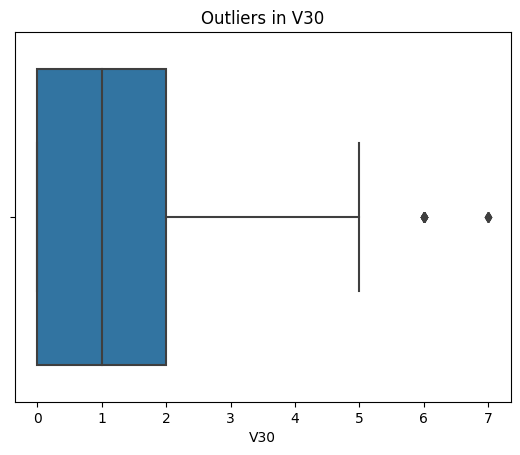

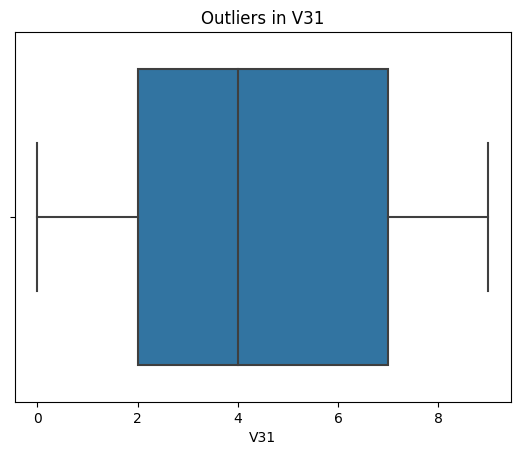

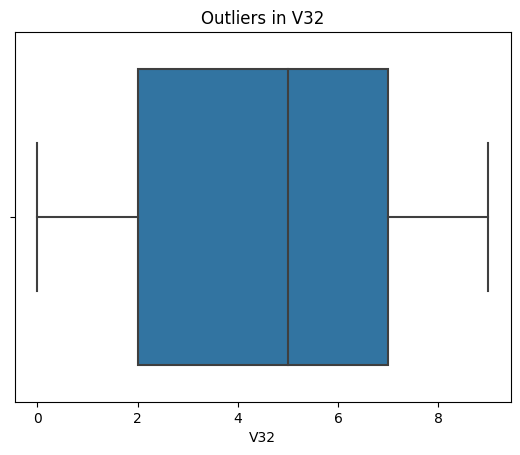

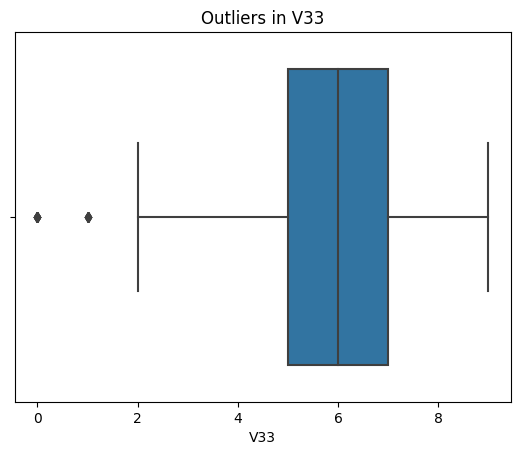

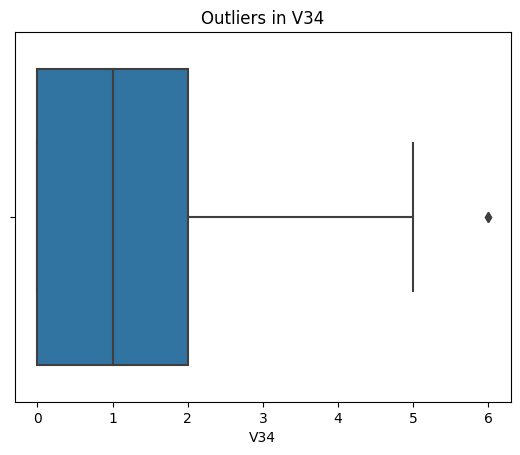

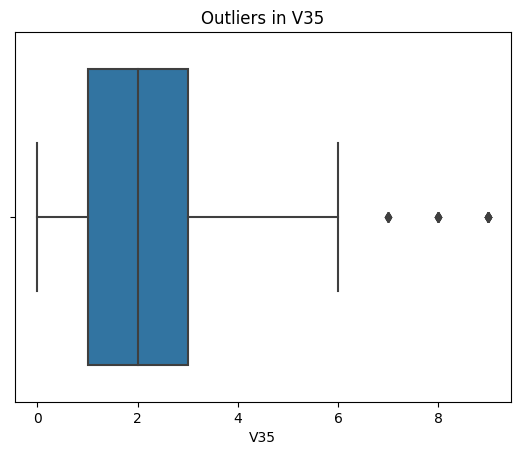

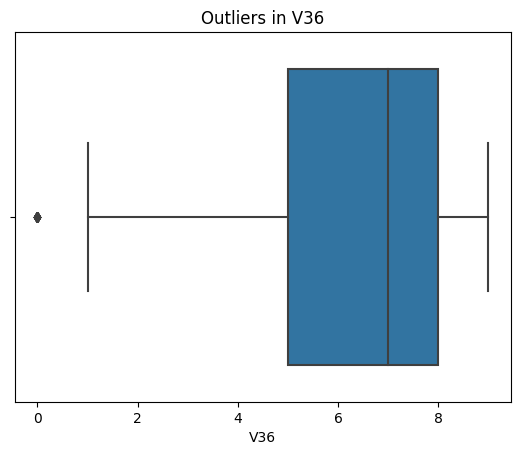

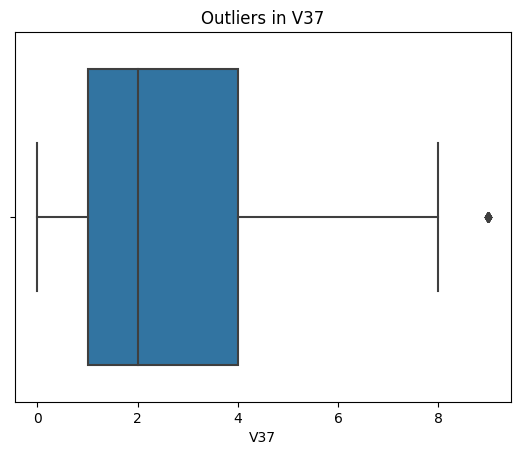

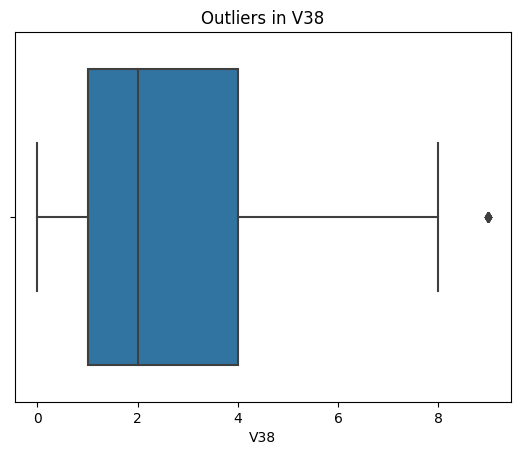

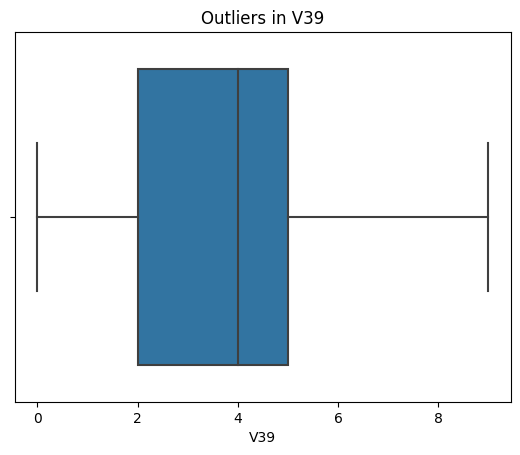

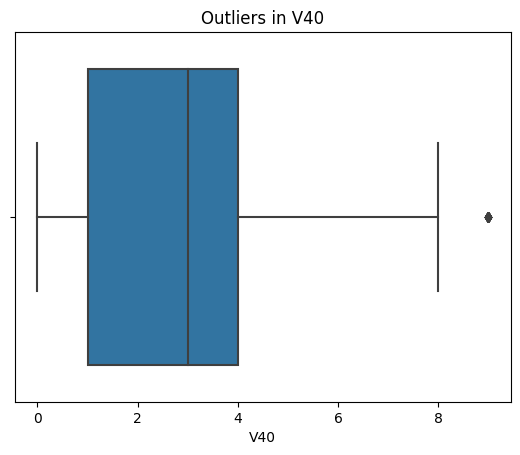

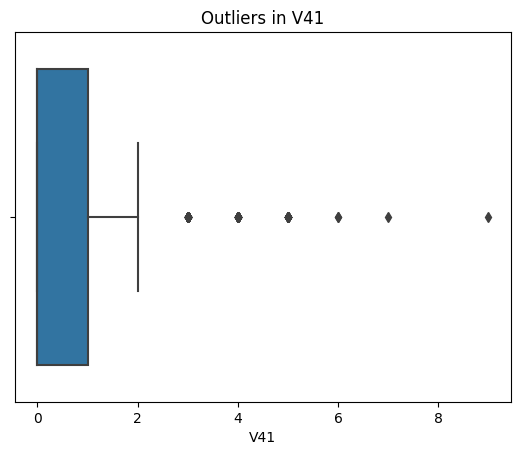

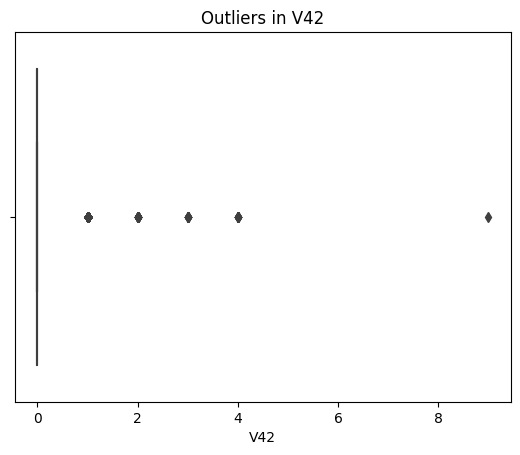

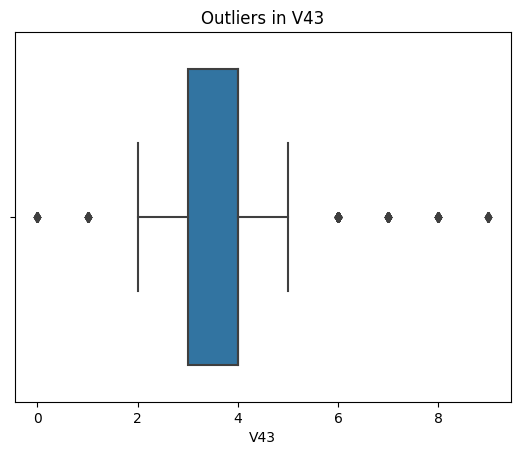

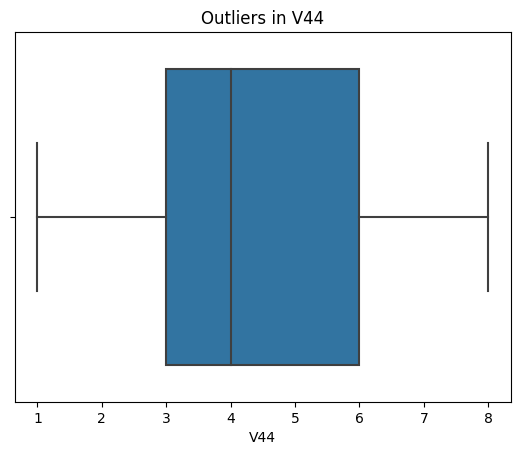

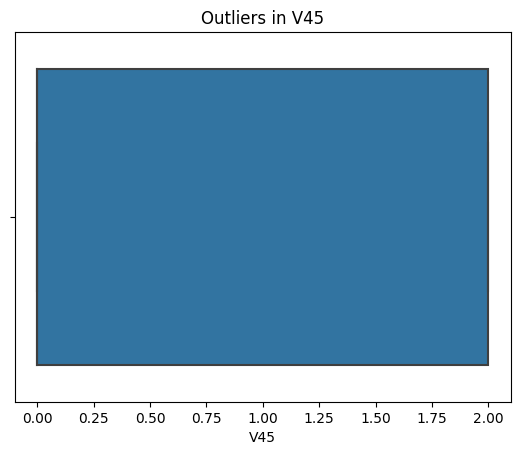

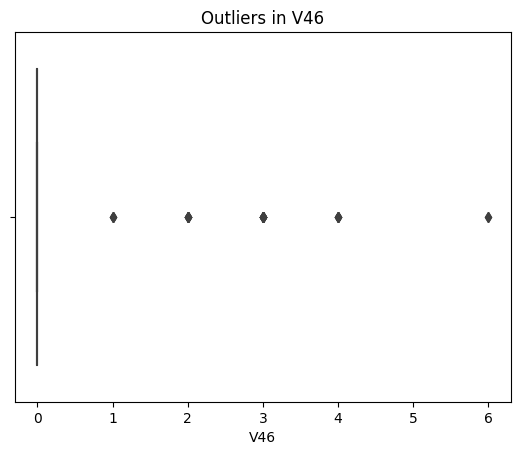

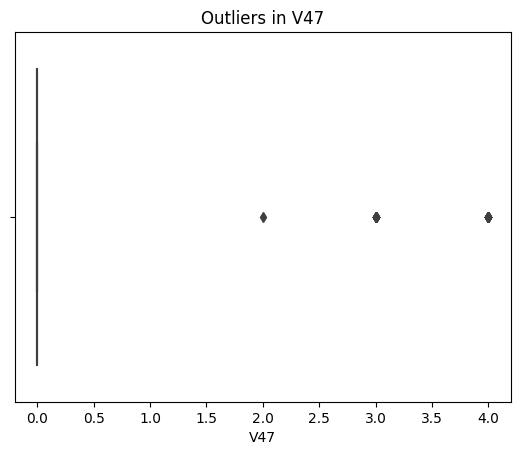

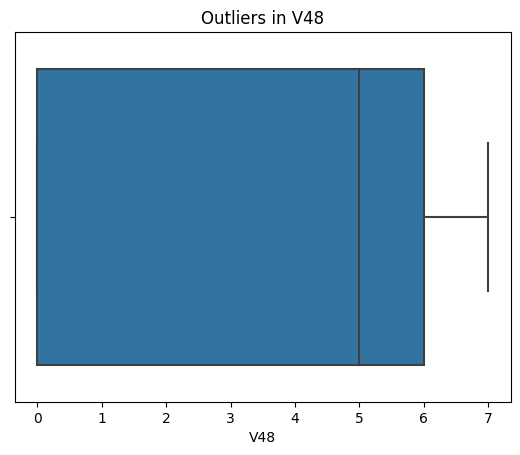

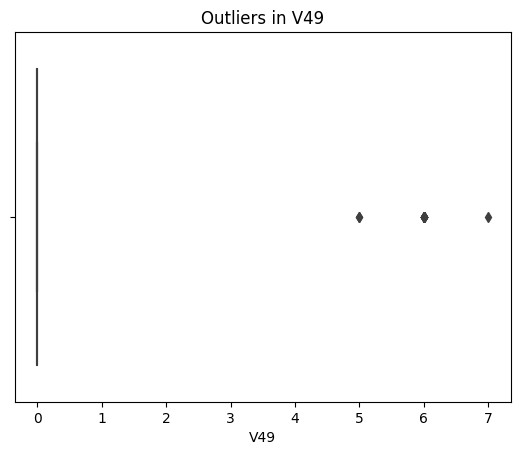

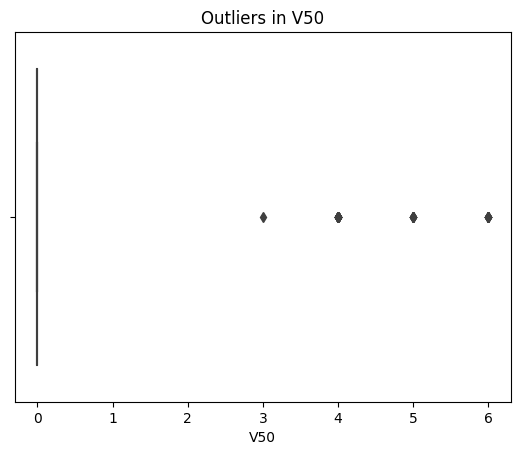

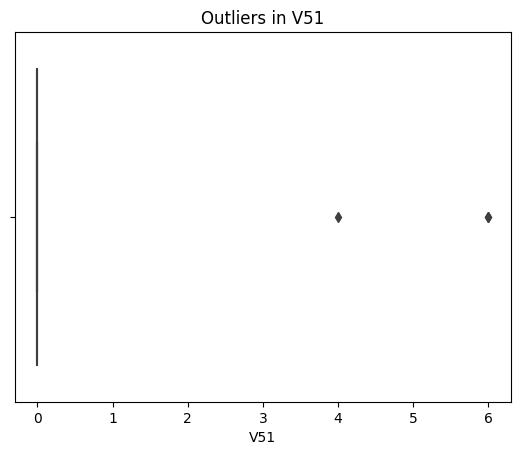

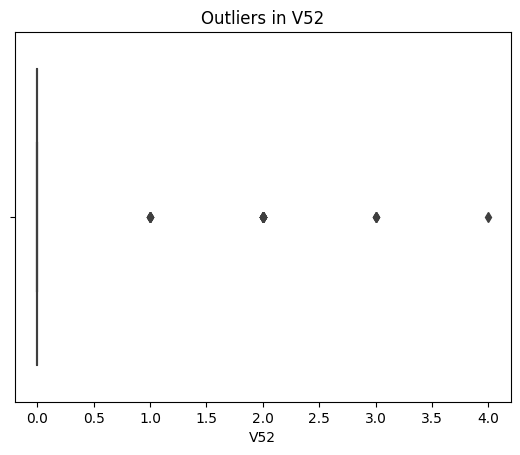

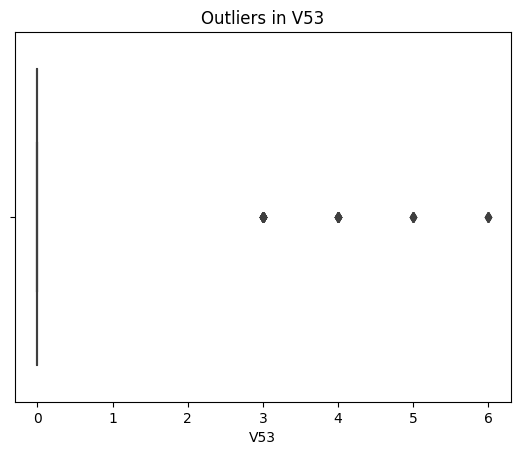

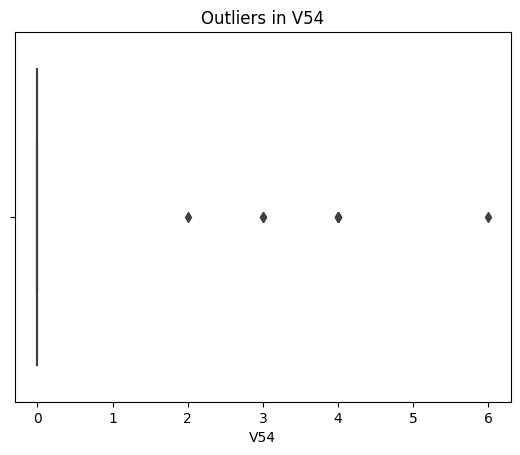

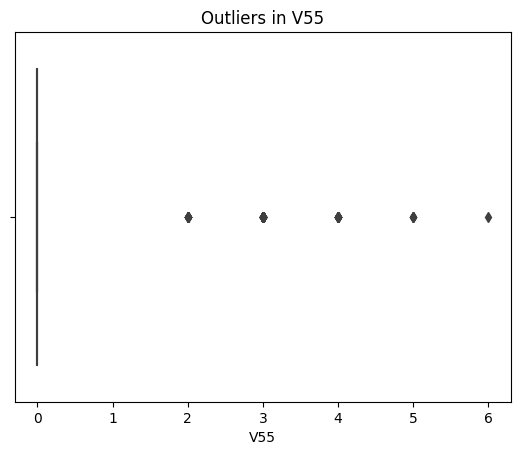

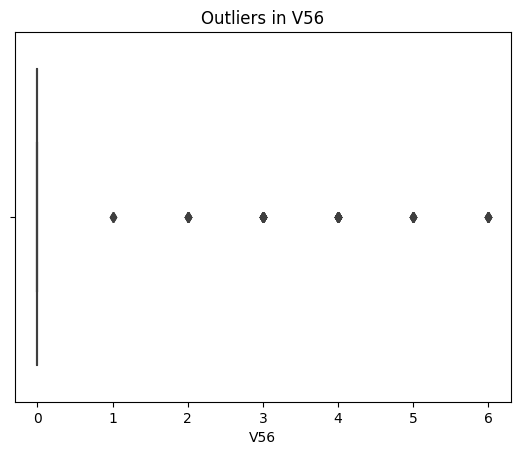

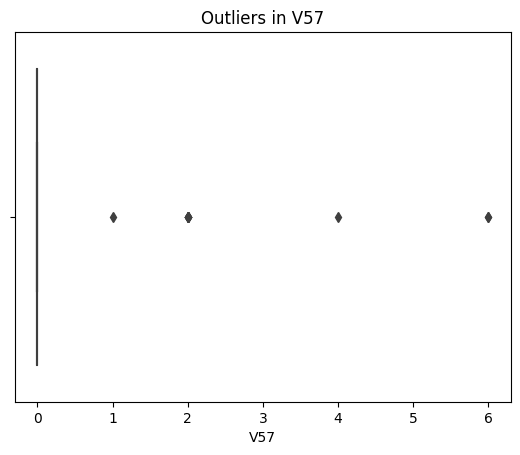

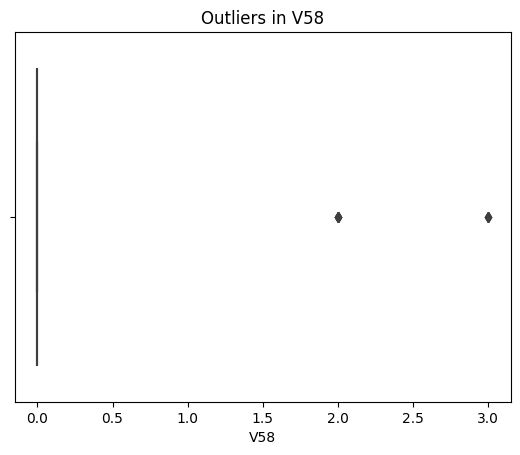

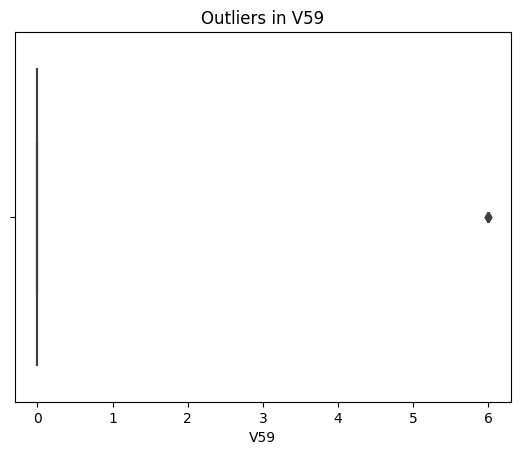

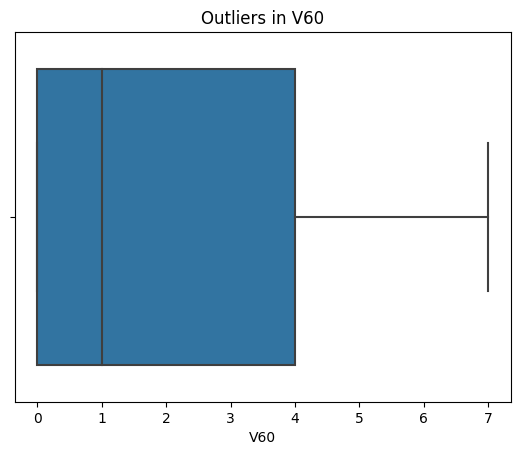

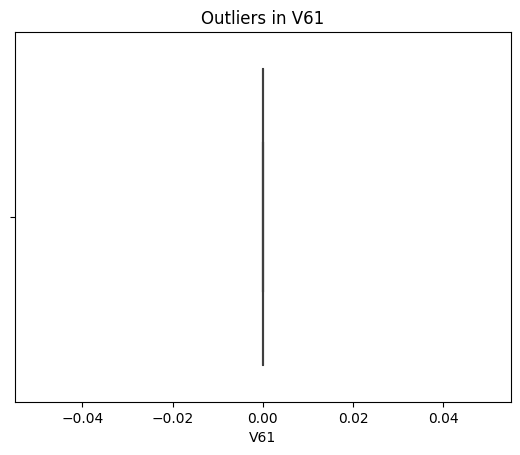

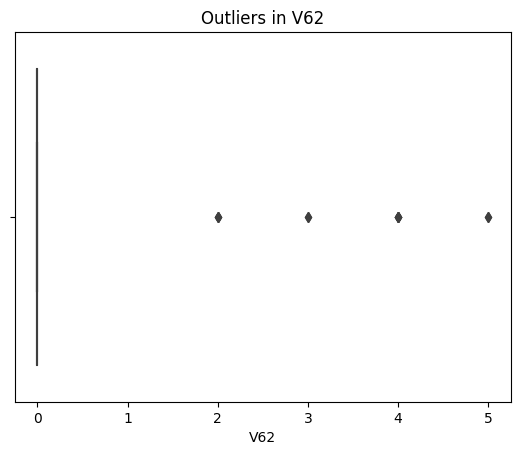

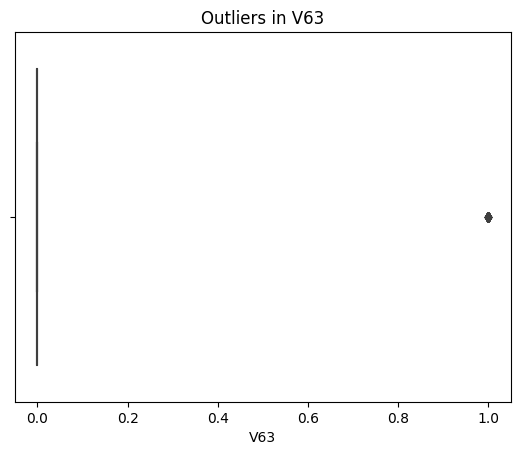

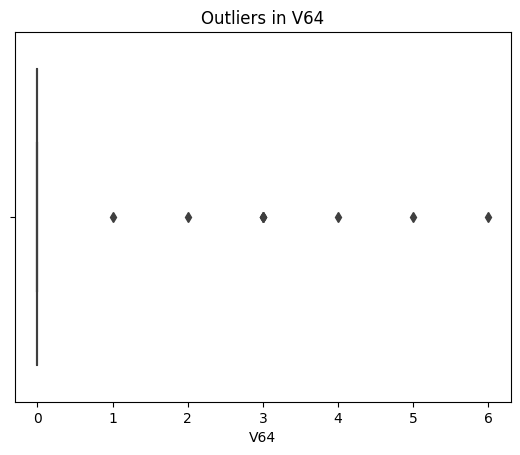

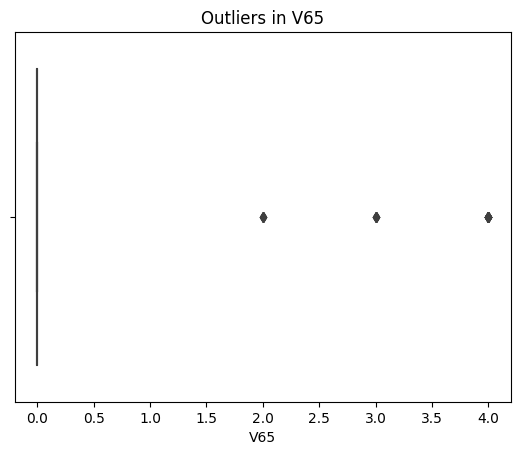

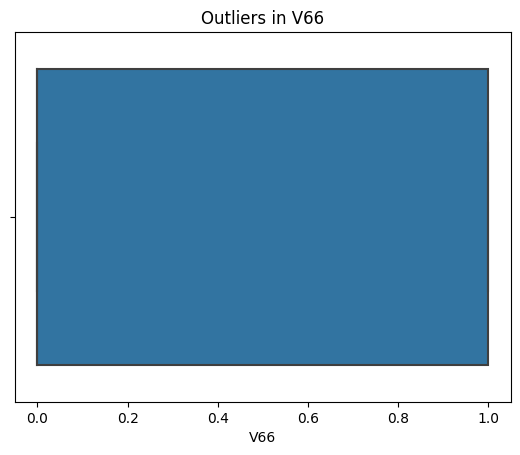

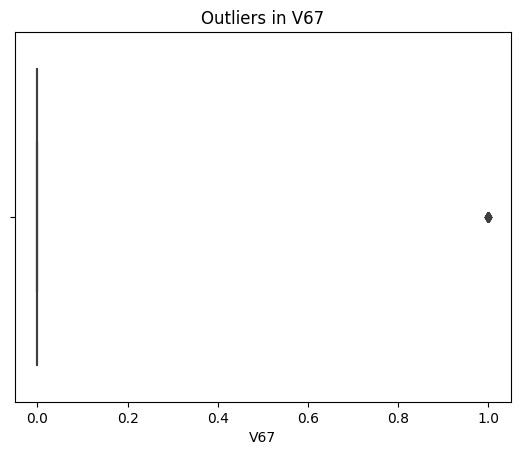

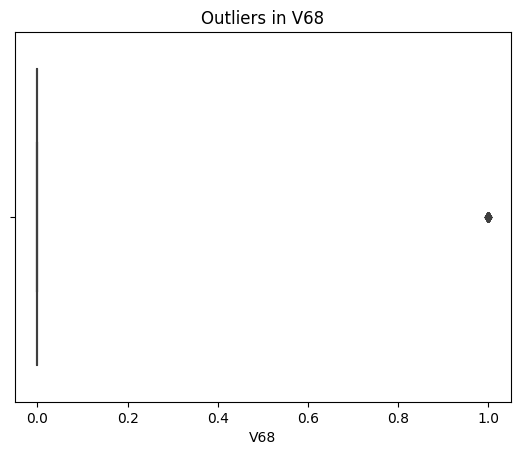

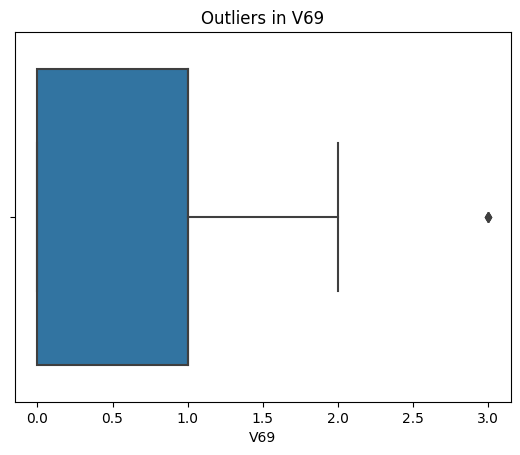

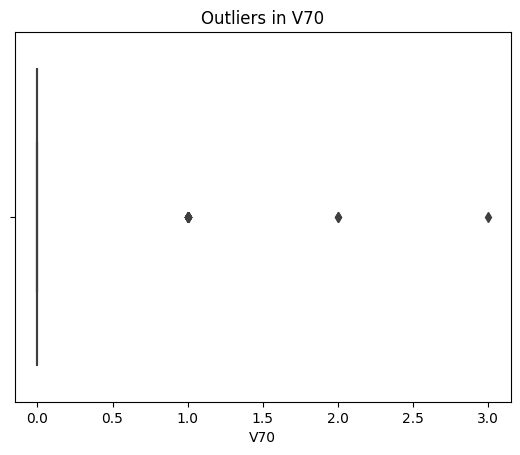

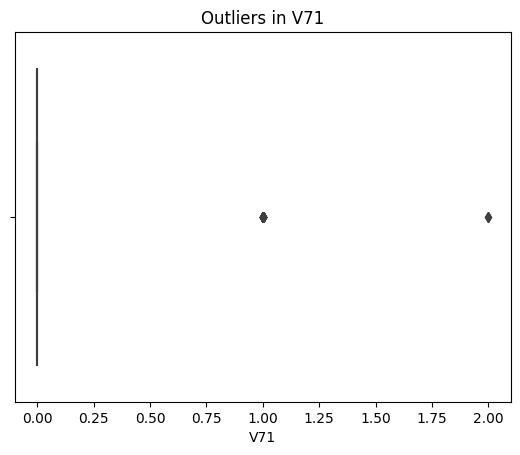

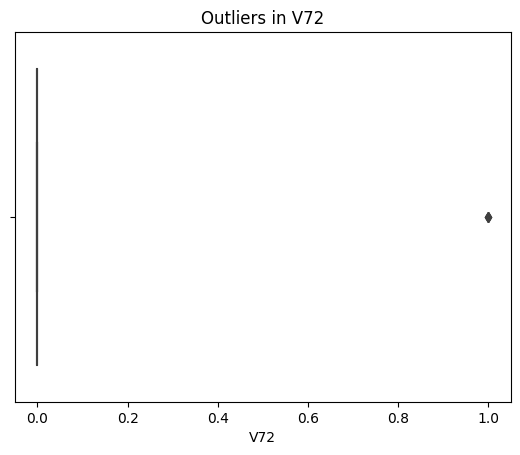

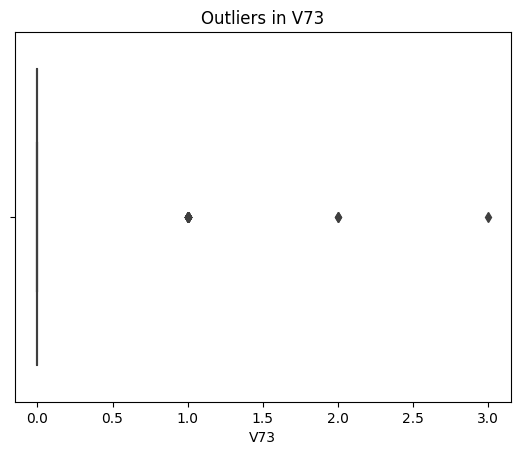

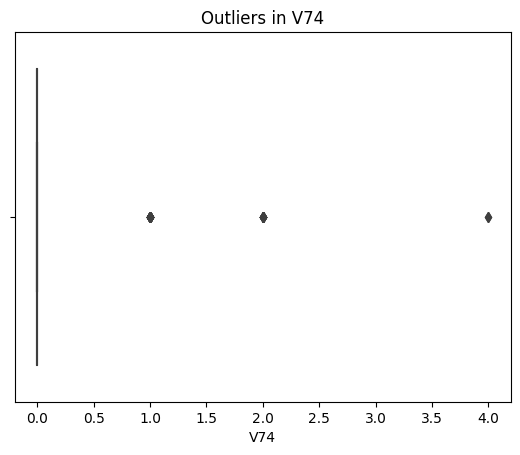

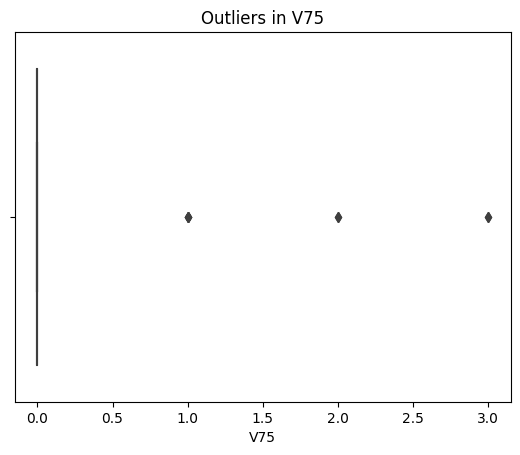

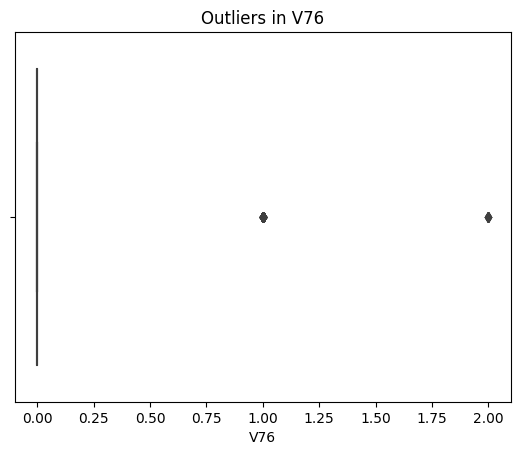

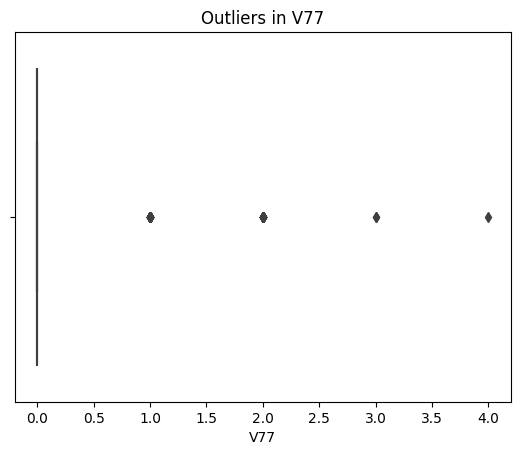

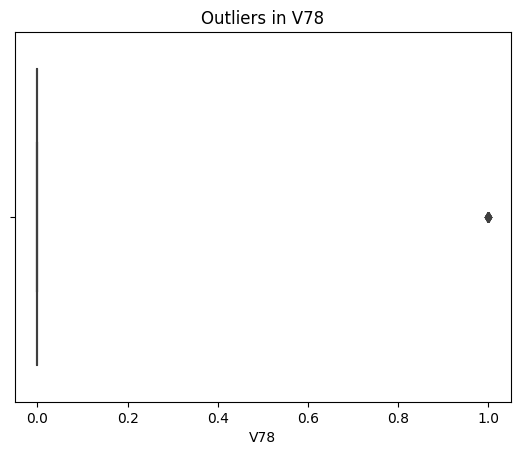

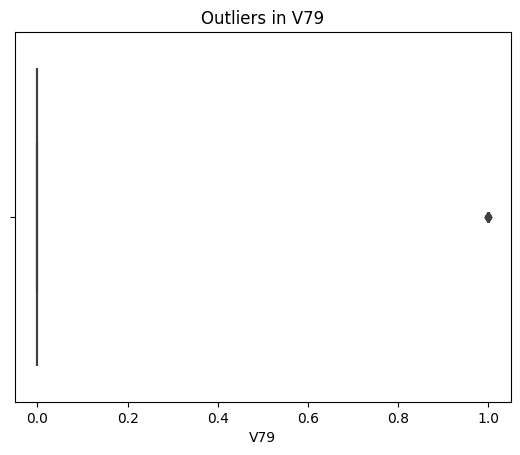

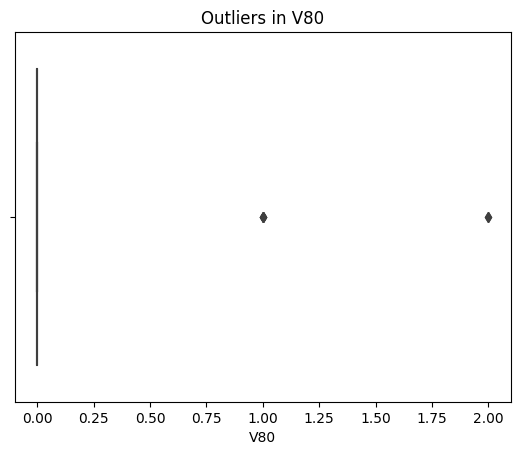

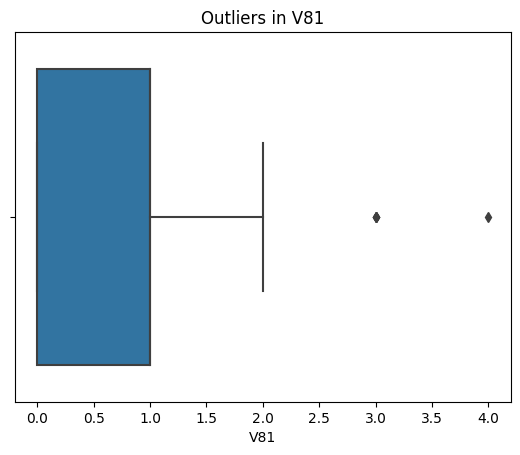

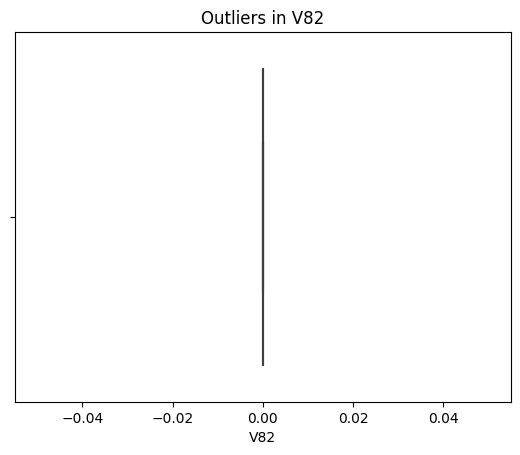

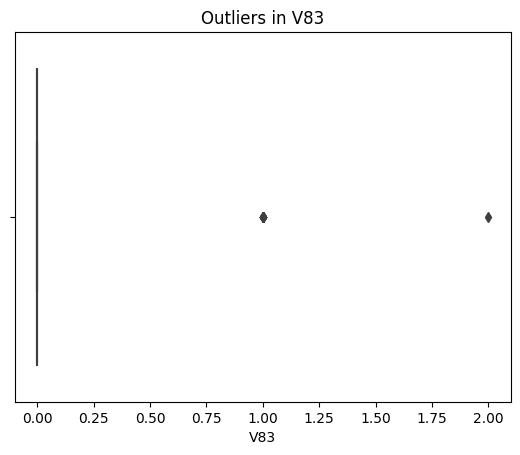

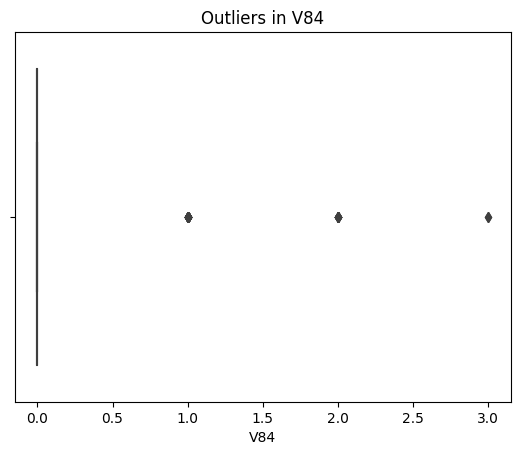

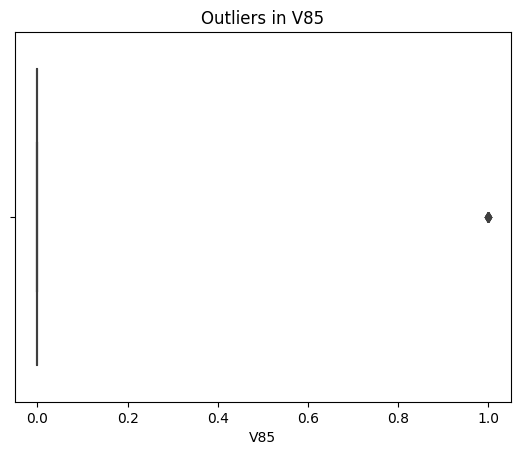

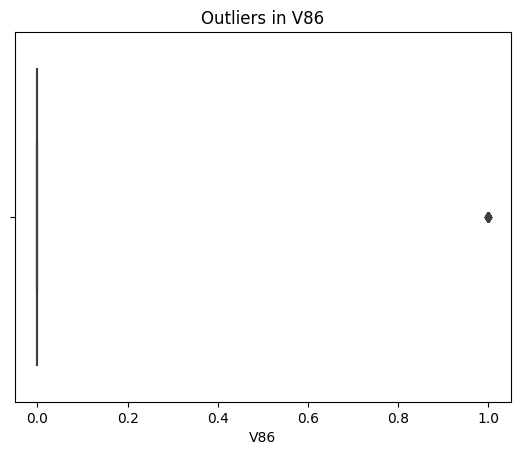

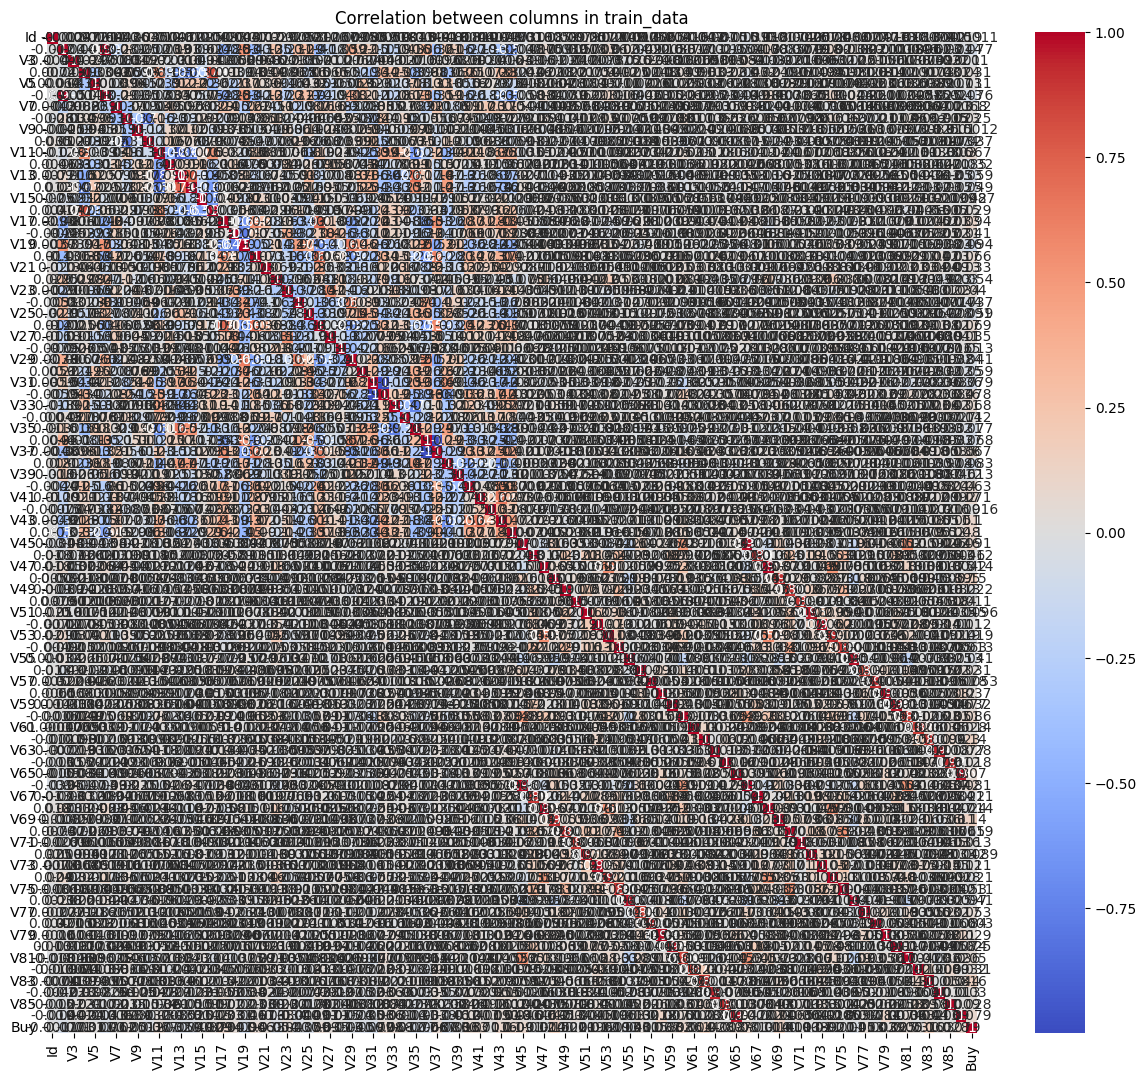

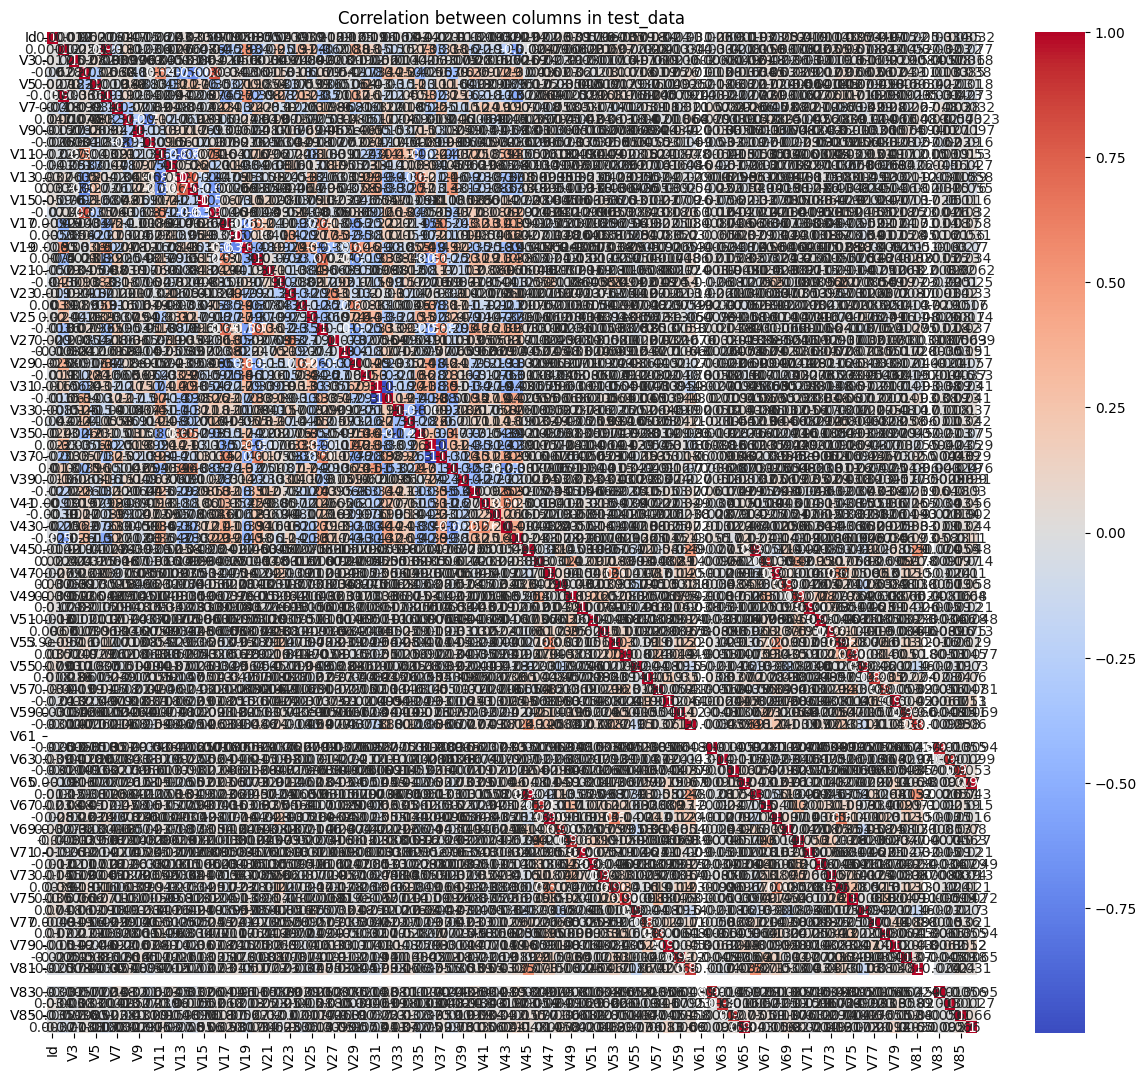

In [15]:
#check outliers on train
for column in train_data.columns:
    sns.boxplot(x=train_data[column])
    plt.title(f"Outliers in {column}")
    plt.show()

#check outliers on test
for column in test_data.columns:
    sns.boxplot(x=test_data[column])
    plt.title(f"Outliers in {column}")
    plt.show()


# Check the correlation
# on train
corr_matrix_train = train_data.corr()

plt.figure(figsize=(15, 13))
sns.heatmap(corr_matrix_train, annot=True, cmap='coolwarm')
plt.title("Correlation between columns in train_data")
plt.show()

#on test
corr_matrix_test = test_data.corr()
plt.figure(figsize=(15, 13))
sns.heatmap(corr_matrix_test, annot=True, cmap='coolwarm')
plt.title("Correlation between columns in test_data")
plt.show()

## Undersample your data

- Undersample the target with ( you may have to pip install -U imbalanced-learn)

from imblearn.over_sampling import RandomOverSampler, SMOTE

Ou 

from imblearn.under_sampling import RandomUnderSampler

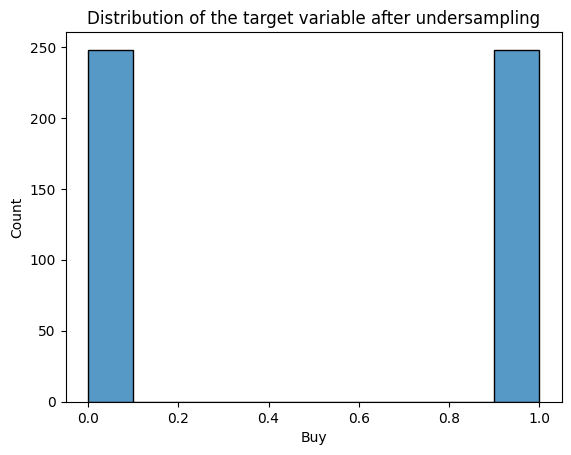

In [16]:
# your code here
undersampler = RandomUnderSampler()
train_data_undersampled, train_target_undersampled = undersampler.fit_resample(train_data, train_data['Buy'])

sns.histplot(train_target_undersampled)
plt.title("Distribution of the target variable after undersampling")
plt.show()

## Building models 

- Build a dummy model to have a baseline score

- Build a better model to classify your data and beat your baseline model

- Check the :
    - accuracy,
    - Recall,
    - Precision,
    - f1 score

- Plot your learning curve
--------------------------------









**⚠️(OPTIONAL)⚠️**
- Try to improve your first model by using a robust scaler or StandardScaler

- Try to use another  classifier model to improve your model performance

- Check the :
    - accuracy,
    - Recall,
    - Precision,
    - f1 score

- Plot your learning curve


Baseline Model Metrics:
Accuracy: 0.5025566106647188
Recall: 0.49193548387096775
Precision: 0.059833251593918585
F1 Score: 0.10668998688237866
Improved Model Metrics:
Accuracy: 0.9245742092457421
Recall: 0.04081632653061224
Precision: 0.11764705882352941
F1 Score: 0.06060606060606061


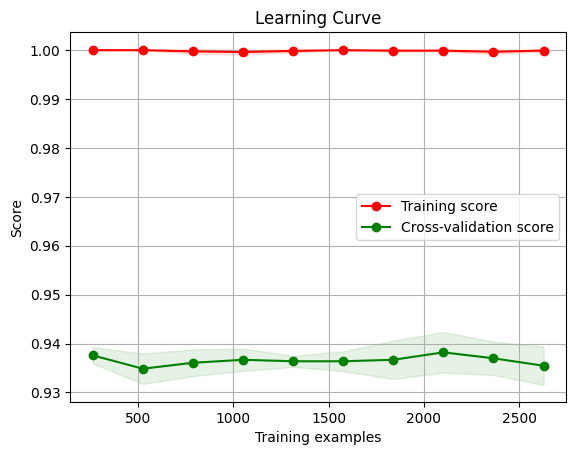

In [17]:
# Baseline Model
dummy_model = DummyClassifier(strategy='uniform')
dummy_model.fit(train_data_undersampled, train_target_undersampled)
dummy_predictions_train = dummy_model.predict(train_data.drop('Buy', axis=1))  # Use train_data for predictions
dummy_predictions_test = dummy_model.predict(test_data)

baseline_accuracy = accuracy_score(train_data['Buy'], dummy_predictions_train)  # Compare with train_data['Buy']
baseline_recall = recall_score(train_data['Buy'], dummy_predictions_train)
baseline_precision = precision_score(train_data['Buy'], dummy_predictions_train)
baseline_f1_score = f1_score(train_data['Buy'], dummy_predictions_train)

print("Baseline Model Metrics:")
print("Accuracy:", baseline_accuracy)
print("Recall:", baseline_recall)
print("Precision:", baseline_precision)
print("F1 Score:", baseline_f1_score)


# Better baseline Model
train_data, test_data, train_target, test_target = train_test_split(train_data.drop('Buy', axis=1), train_data['Buy'], test_size=0.2, random_state=42)

# Use RandomForestClassifier Model
model = RandomForestClassifier()

model.fit(train_data, train_target)

predictions = model.predict(test_data)

accuracy = accuracy_score(test_target, predictions)
recall = recall_score(test_target, predictions)
precision = precision_score(test_target, predictions)
f1 = f1_score(test_target, predictions)

print("Improved Model Metrics:")
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)


# Plot learning curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

plot_learning_curve(model, train_data, train_target)

# Finish ?

add your code to a repos and send me the link by mail in the format :

the subject of the email will be **YOUR NAME | ML-IIM-challenge**

Send it to magloire.ndabagera@gmail.com at 5pm max.